# Этап 1. Загрузим необходимые библиотеки и данные. Просмотрим их и преобразуем

In [386]:
import numpy as np
import pandas as pd
#import chart_studio.plotly.plotly as py
#from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode(connected=True)
import plotly.graph_objects as go
import plotly.express as px
import statsmodels.api as sm

In [387]:
# класс для построения визуализация для числового признака и нахождения выбросов.

class AnalyzNumCol():
    def __init__(self, df, col):
        self.df = df[col]
        self.col = col
        self.col_log = LogDf(df, col).col_log
        self.df_log = LogDf(df, col).df_col_log()
    
    def show_plots(self, size = 5, log = False):
        
        if log:
            data = self.df_log
            column = self.col_log
        else:
            data = self.df
            column = self.col
        
        f = plt.figure()
        f.clear()
        plt.close(f)

        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (3*size,size))
        
        fig.suptitle('Histogram, QQ-plot and boxplot for {0} '.format(column))
        ax1.hist(data.dropna(), bins = 20, histtype = 'bar', align = 'mid', rwidth = 0.8, color = 'red')
        fig = sm.qqplot(data.dropna(), fit = True, line ='45', ax=ax2) 
        
        
        
        ax3.boxplot(data.dropna(), vert = False)  # выбросы
     
        plt.show
        
    def emission_limits(self, log = False): # границы выбросов
        if log:
            data = self.df_log
            column = self.col_log
        else:
            data = self.df
            column = self.col
        
        q1 = data.quantile(q = 0.25) 
        q3 = data.quantile(q = 0.75) 
        IQR = q3 - q1
        return q1 - 1.5*IQR, q3 + 1.5*IQR

    def amount_emissions(self, log = False): 
        if log:
            data = self.df_log
            column = self.col_log
        else:
            data = self.df
            column = self.col

        minb, maxb = self.emission_limits(log)
        return len(data[data < minb])+ len(data[data > maxb])

    
# класс логарифмирования признака
    
class LogDf(): 
    def __init__(self, df, col):
        self.df = df
        self.col = col
        self.col_log = col + '_log'
        
    def df_col_log(self):      
        return  self.df[self.col].apply(lambda x: np.log(x + 1)) 

In [388]:
colB = pd.read_csv("COLUMNB_ANYU_ALL_2016.csv")
colC = pd.read_csv("COLUMNC_NPND_ALL_2016.csv")
colD = pd.read_csv("COLUMND_WPWD_ALL_2016.csv")
colE = pd.read_csv("COLUMNE_WPND_ALL_2016.csv")
allinall = pd.read_csv("ALL_PAINTYPES_2016.csv")

In [389]:
Datas = [allinall,colB,colC,colD,colE]
Datas_name =  ['allinall','colB','colC','colD','colE']
count = 0
for data in Datas:
    print(print(Datas_name[count]))
    data.info()
    print()
    count += 1

allinall
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 12 columns):
State                        52 non-null object
All Other Covered Animals    52 non-null object
Cats                         52 non-null object
Dogs                         52 non-null object
Guinea Pigs                  52 non-null object
Hamsters                     52 non-null object
Nonhuman Primates            52 non-null object
Other Farm Animals           52 non-null object
Pig                          52 non-null object
Rabbits                      52 non-null object
Sheep                        52 non-null object
Total                        52 non-null object
dtypes: object(12)
memory usage: 5.0+ KB

colB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 12 columns):
State                        52 non-null object
All Other Covered Animals    52 non-null object
Cats                         52 non-null int64
Dogs     

In [390]:
colB

,State,All Other Covered Animals,Cats,Dogs,Guinea Pigs,Hamsters,Nonhuman Primates,Other Farm Animals,Pig,Rabbits,Sheep,Total
0,AK,25,0,0,0,0,0,0,0,0,0,25
1,AL,730,132,141,0,0,0,39,"1,249",23,3,"2,317"
2,AR,5,25,94,0,1,56,0,0,40,0,221
3,AZ,81,2,9,0,0,6,0,29,4,19,150
4,CA,"4,781",138,161,104,207,"3,596",692,47,"2,455",57,"12,238"
5,CO,827,15,19,44,16,0,3,4,0,51,979
6,CT,125,2,0,1,0,16,0,0,2,0,146
7,DC,0,18,0,142,37,361,0,5,8,0,571
8,DE,0,0,0,0,0,0,140,0,"3,960",54,"4,154"
9,FL,832,30,14,1,66,"3,923",0,5,0,4,"4,875"


Вывод
------

1. Пропущенных значений в данных нет
2. Все данные кроме столбца являются числовыми и им необходимо поменять формат.

In [391]:
objects = colB.columns[1:12]

for data in Datas:
    for col in objects:
        try:
            data[col] = data[col].apply(lambda x:int("".join(x.split(","))))
        except AttributeError:
            pass
        
allinall["info"] = ["all"]*52
colB["info"] = ["held by facility"]*52
colC["info"] = ["No pain; No pain drugs"]*52
colD["info"] = ["Yes pain; Yes pain drugs"]*52
colE["info"] = ["Yes pain; No pain drugs"]*52

In [392]:
colB_copy = colB.copy()
colC_copy = colC.copy()
colD_copy = colD.copy()
colE_copy = colE.copy()
allinall_copy = allinall.copy()

# Этап 2. Провести предварительный анализ данных

Проанализируем  по количеству используемых животных 
------

In [393]:
xaxis = ["all", "held by facility","No pain; No pain drugs","Yes pain; Yes pain drugs","Yes pain; No pain drugs"]
value =[]

for data in Datas:
    value.append(data.Total.sum())


fig = go.Figure(data=go.Scatter(x=xaxis,y=value))

fig.show()

Вывод
-----

1. Общее количество животных предназначенных для исследований, испытаний, обучения, экспериментов и/или хирургии в 2016 г. превышает 820 812;
2. 137 444 животных не было задействовано в исследований, испытаний, обучения, экспериментов и/или хирургии;
3. 506 560 животных не испытывало боли при проведении исследований, испытаний, обучения, экспериментов и/или хирургии;
4. 247 882 животных испытывало боль при проведении исследований, испытаний, обучения, экспериментов и/или хирургии, но боль была купирована;
5. 71 370  животных испытывало боль при проведении исследований, испытаний, обучения, экспериментов и/или хирургии, боль купирована не была. 

Проанализируем распрделение животных по группам исследований, испытаний, обучения, экспериментов и/или хирургии в разрезе типов животных и штатов США
------

In [394]:
all_animals = allinall.drop(['State', 'info', 'Total'], axis =1).sum()
all_animals = pd.DataFrame(all_animals).reset_index()
all_animals.columns = ['animals', 'count']
fig = px.bar(all_animals, x = 'animals', y = 'count', color="animals", title="all animals")
fig.show()

Вывод 
------

1. Наибольшее количество задействованных животных в исследованиях, испытаниях, обучении, экспериментах и/или хирургии - морские свинки (183 237);
2. На втором месте - другие животные (161 467);
3. На третьем месте - кролики (139 391);
4. На четвертом месте хомяки.
5. Остальных животных используют менее 100 000.


In [395]:
for data in Datas:
    tt = data.loc[0, 'info']
    Nind = data.Total.sort_values(ascending=False)[0:20].index.values
    Scol = data.reindex(Nind)
    requiredcolumns = data.columns[1:11]
    Layerlist= []
    for yaxis in range(10):
        Layerlist.append(go.Bar(x=Scol.State,y=Scol[requiredcolumns[yaxis]],name=requiredcolumns[yaxis],
                                text = Scol[requiredcolumns[yaxis]]))
    
    Layout= go.Layout(barmode="relative", title = tt)
    fig = go.Figure(data = Layerlist,layout = Layout)
    fig.show()

Вывод
------

1. Совокупное использование животных во всех типах исследований:
   - первые три места занимают следующие штаты: New Jersey, California, Massachusetts.
   - наибольшее количество кроликов (зачастую, эти животные используются для экспериментов на глазах. Это объясняется тем, что у кроликов нет слез. Животных фиксируют так, чтобы они не могли тереть глаза, а затем закапывают тестируемый элемент), хомяков, морских свинок ( активно используются при тестировании противовирусных препаратов, исследовании протекания вирусных инфекций);
   - наименьшее количество овец, котов и других животных.
2. Использование животных во всех типах исследований, где животные не чувствуют боли и не принимают лекарства от нее:
   - Первые три места занимают Ohio, New Jersey, Massachusetts
   - Наиболее часто используют дргие виды животных, морских свинок, кроликов
   - меньше всего используют котов, свиней и собак
3. Использование животных во всех типах исследований, где животные чувствуют боли и принимают лекарства от нее:
   - превые три места занимают California, Maryland, Massachusetts 
   - Наиболее часто используют дргие виды животных, морских свинок, кроликов
   - меньше всего используют овец, котов и других сельскохозяйственных животных
4. Использование животных во всех типах исследований, где животные чувствуют боли, но не принимают лекарства от нее:
   - Первые три места занимают Missouri, Michigan, New Jersey
   - Наиболее часто используют хомяки, морские свинки, собаки
   - меньше всего используют овец, других сх животных, свиней

Просмотрим числовые данные на выбросы и оценим как с ними бороться
------

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_

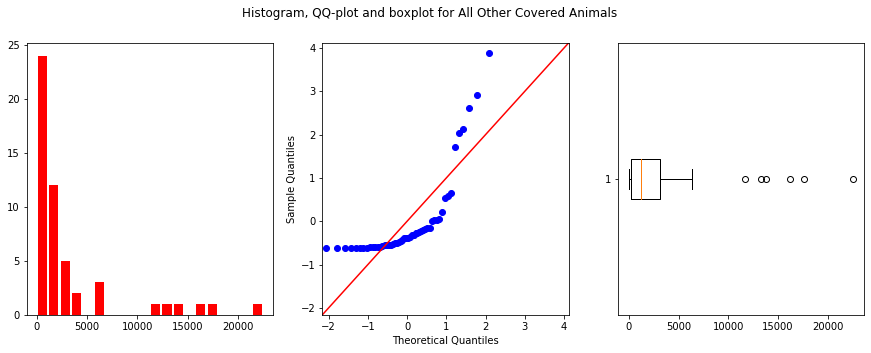

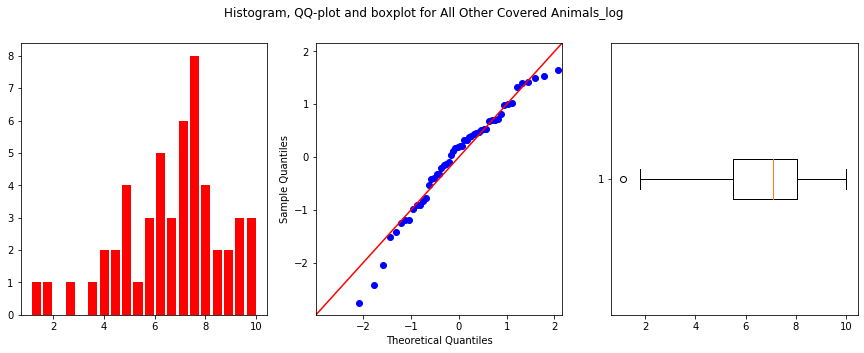

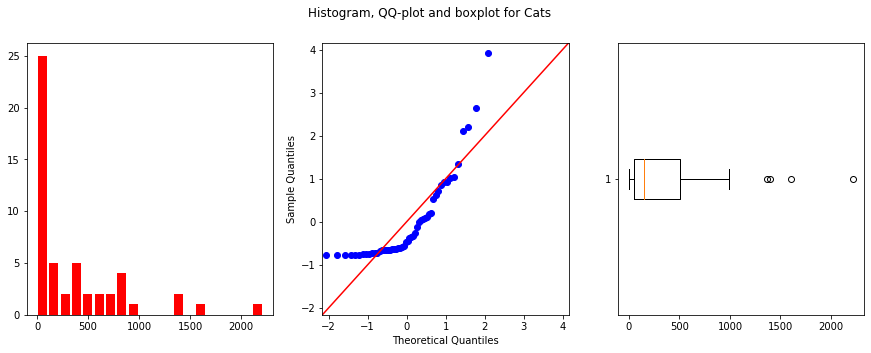

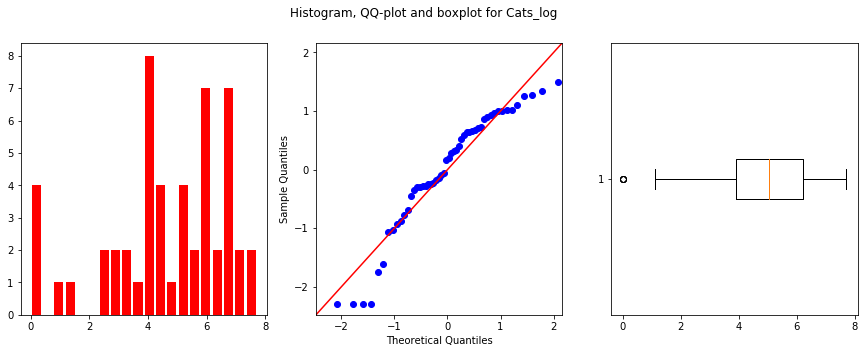

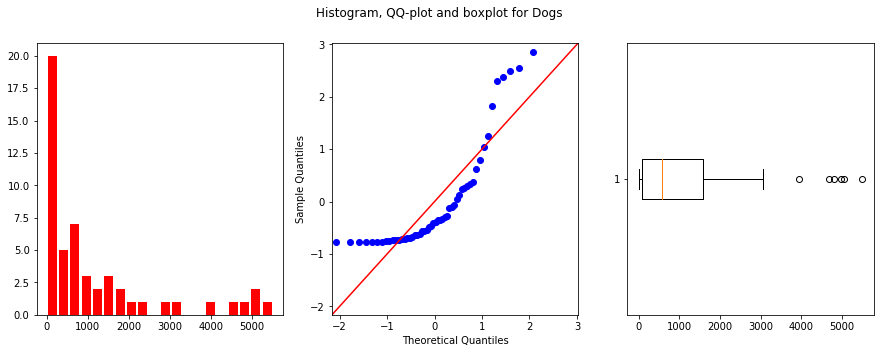

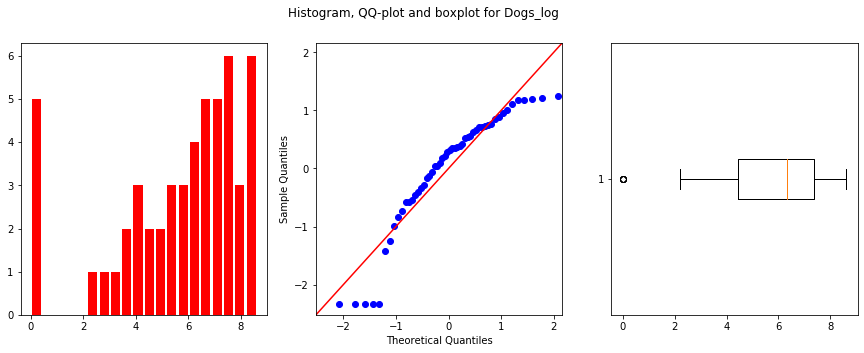

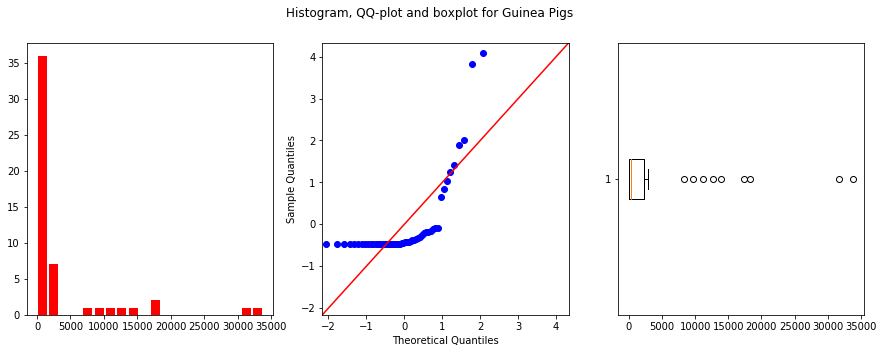

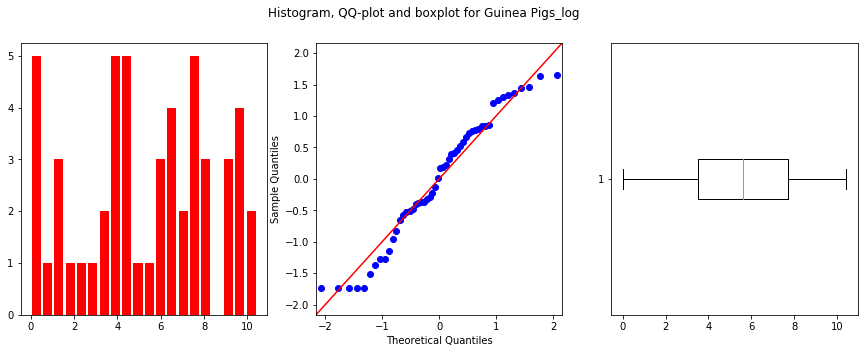

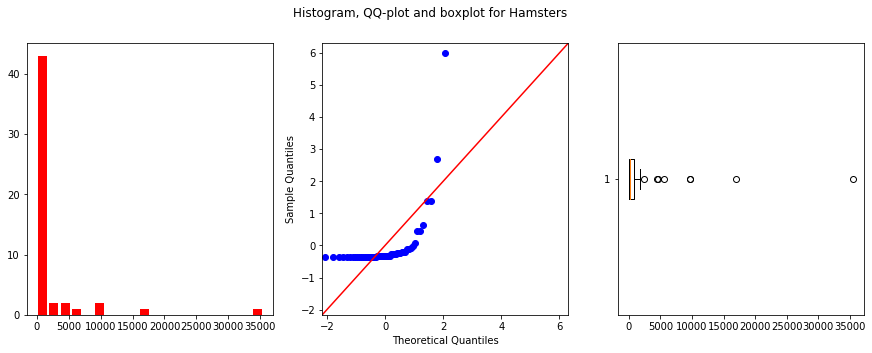

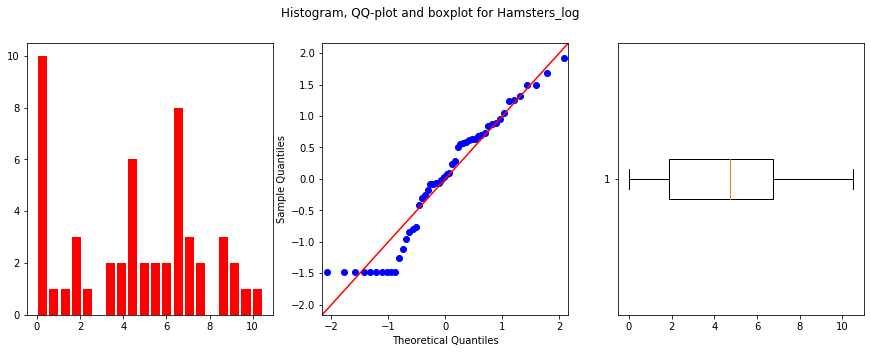

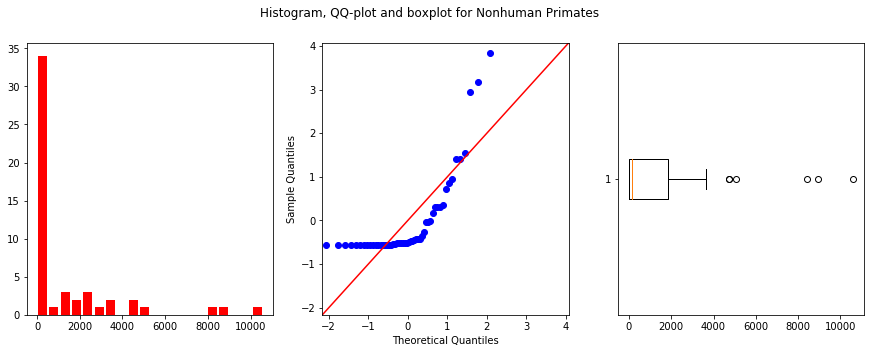

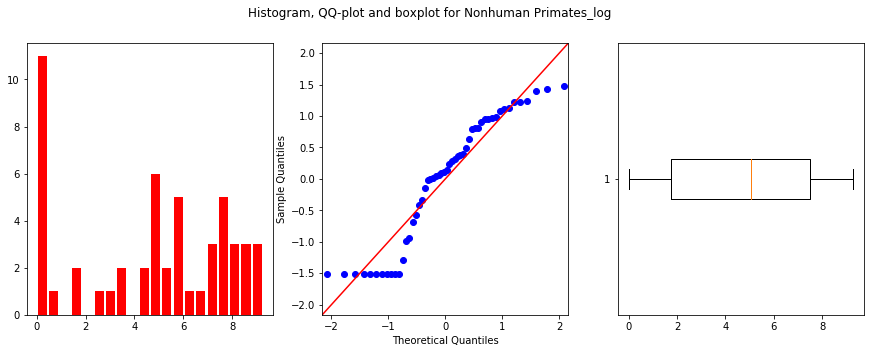

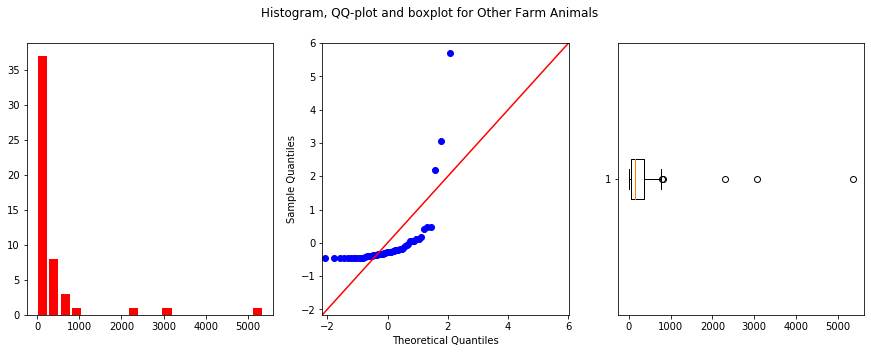

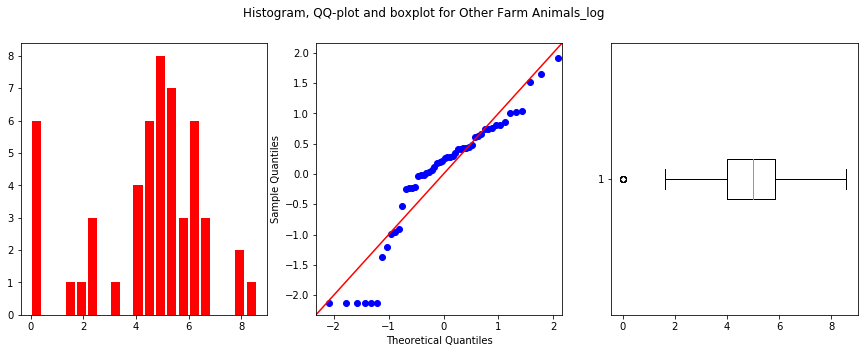

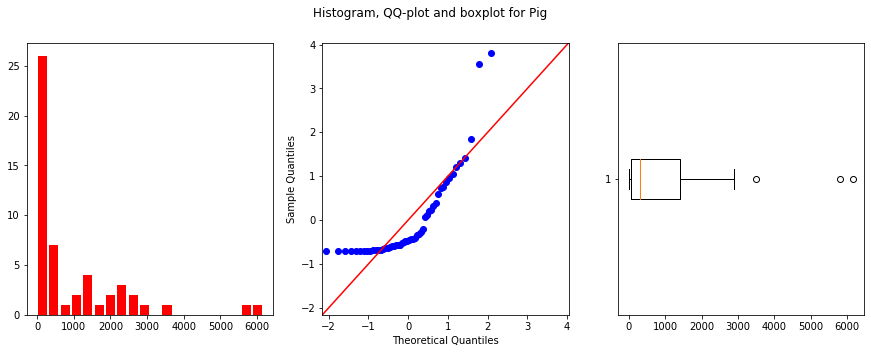

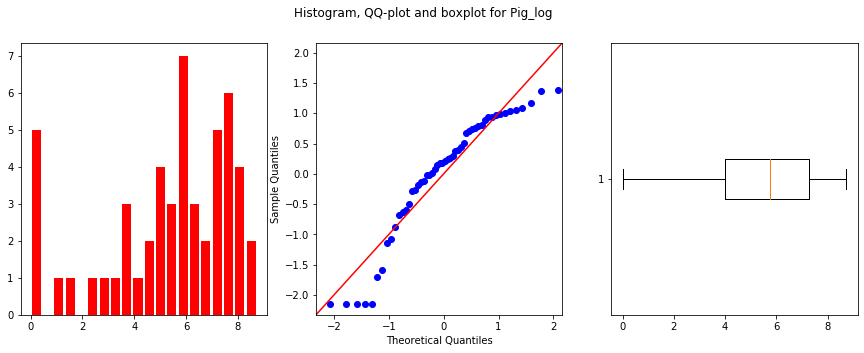

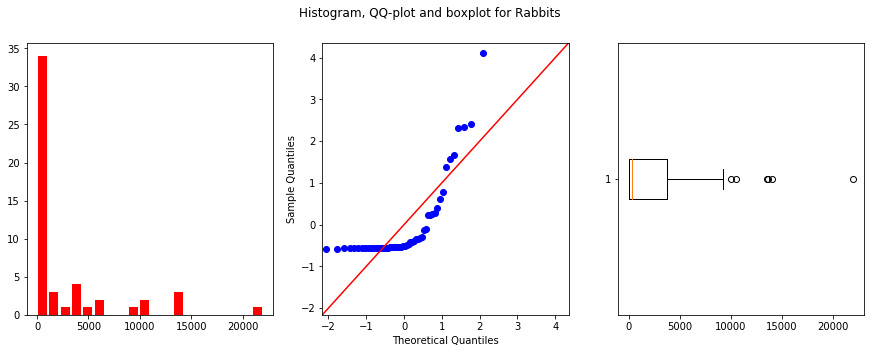

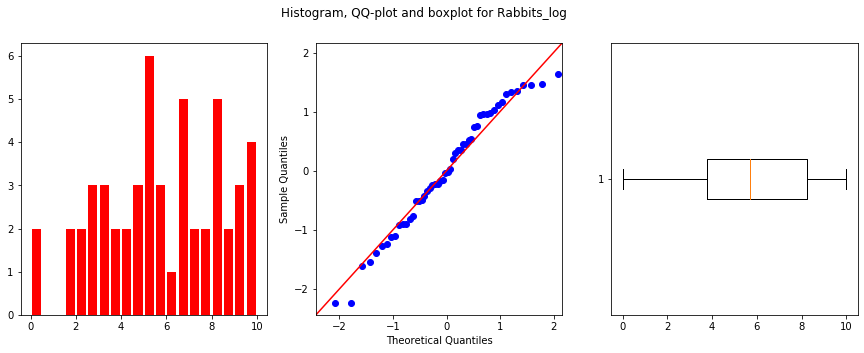

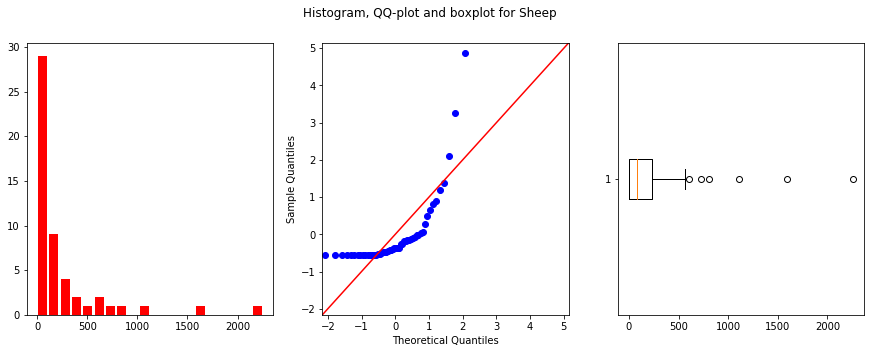

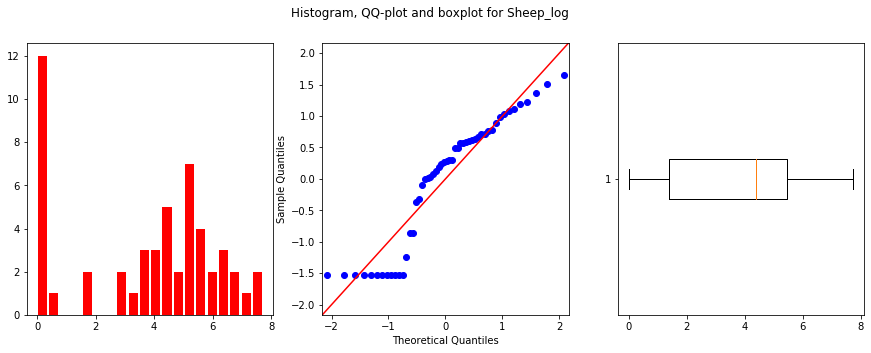

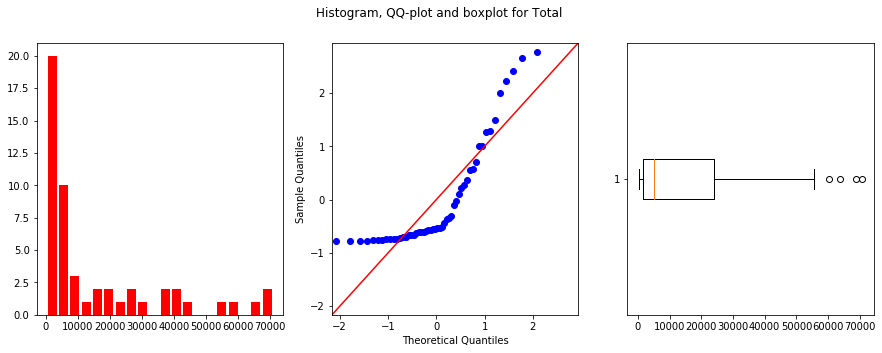

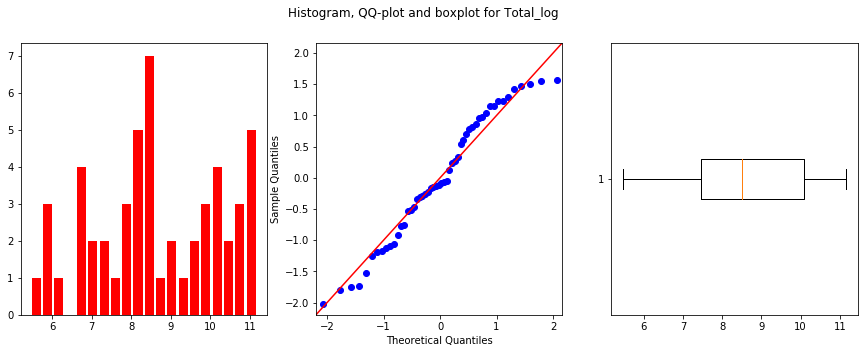

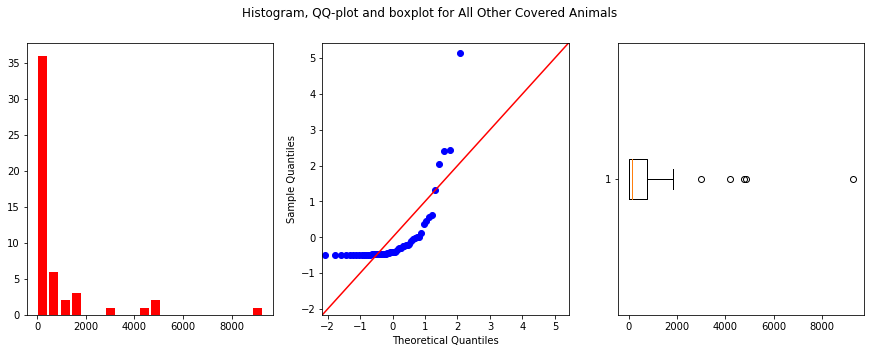

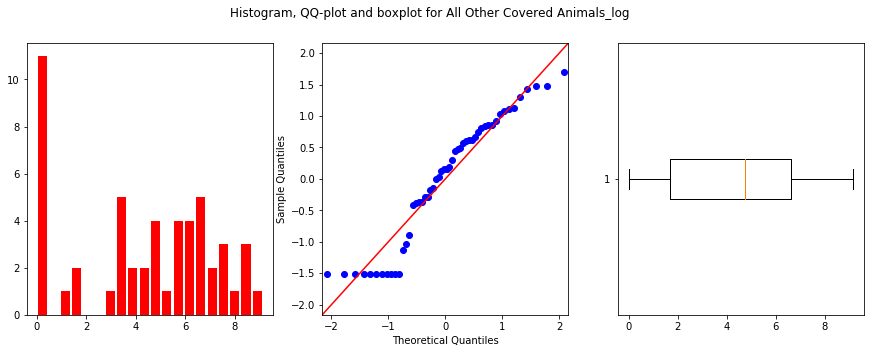

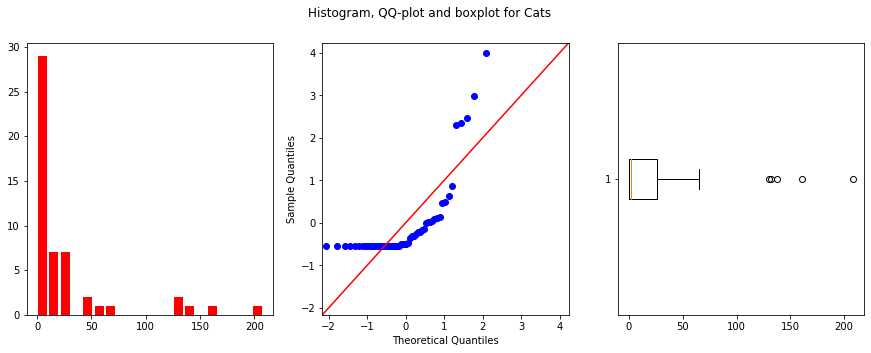

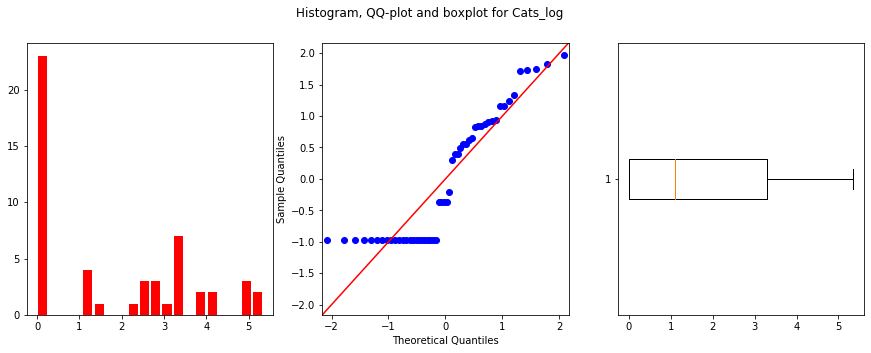

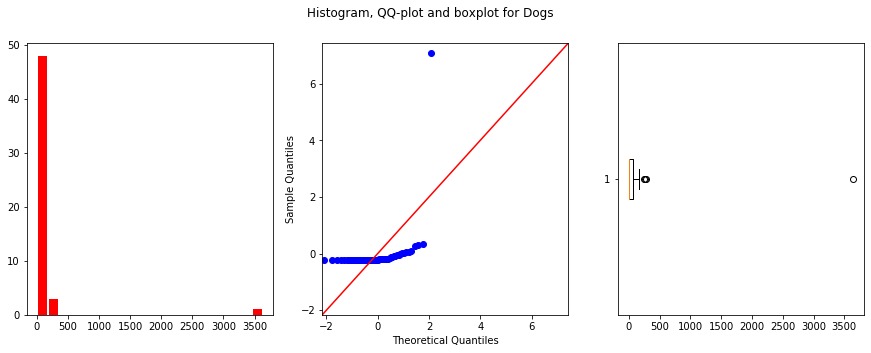

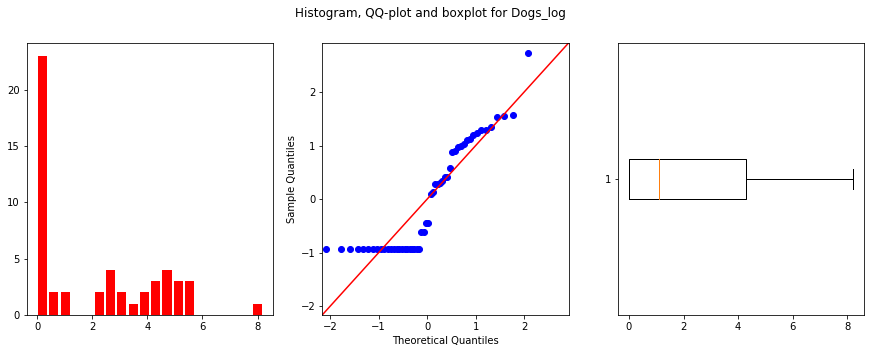

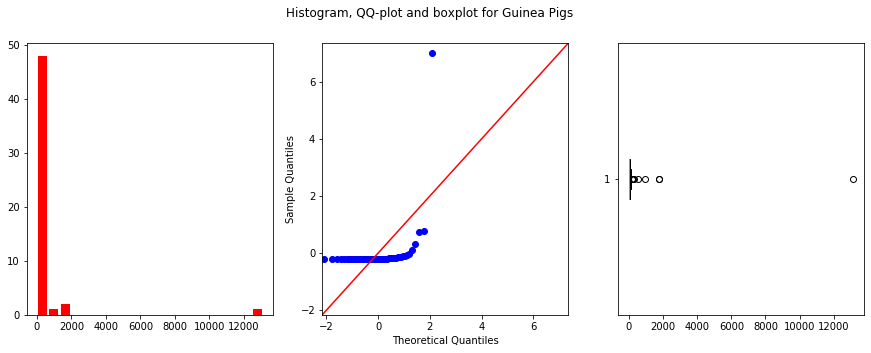

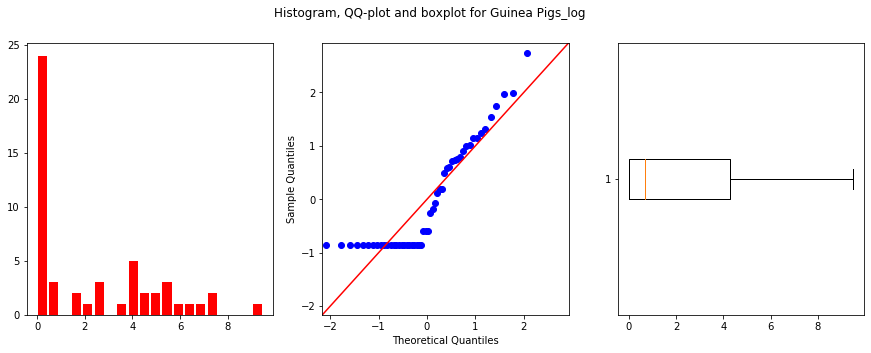

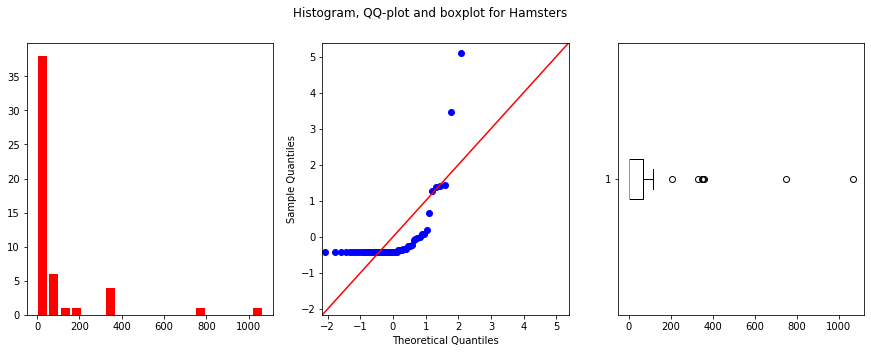

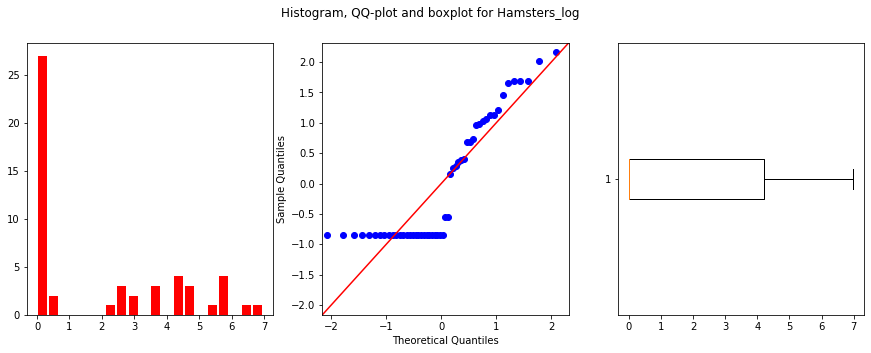

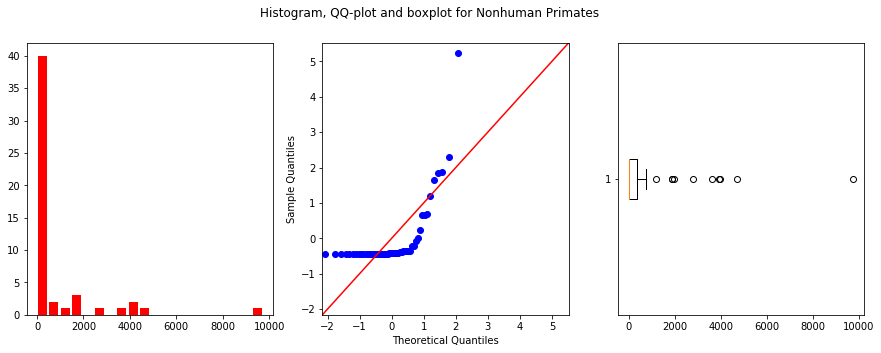

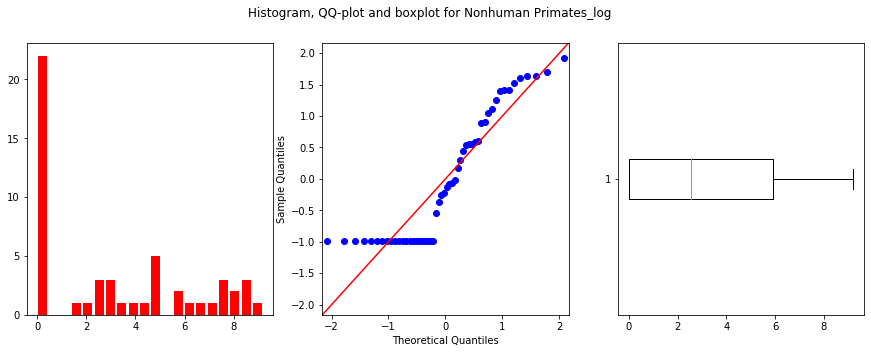

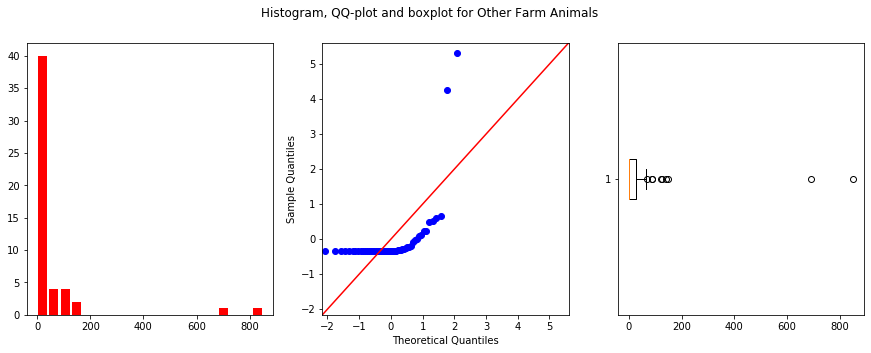

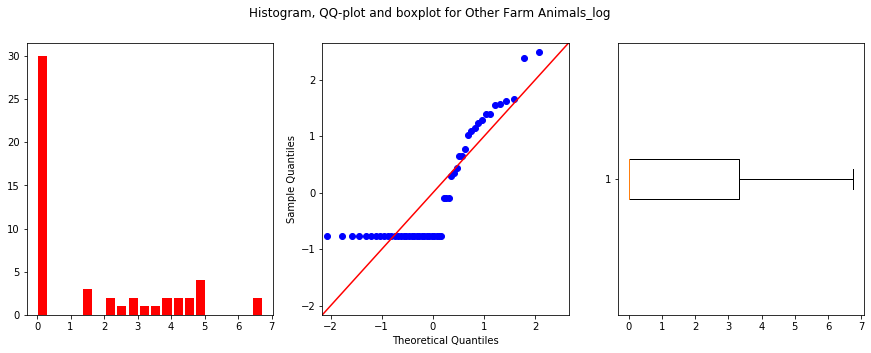

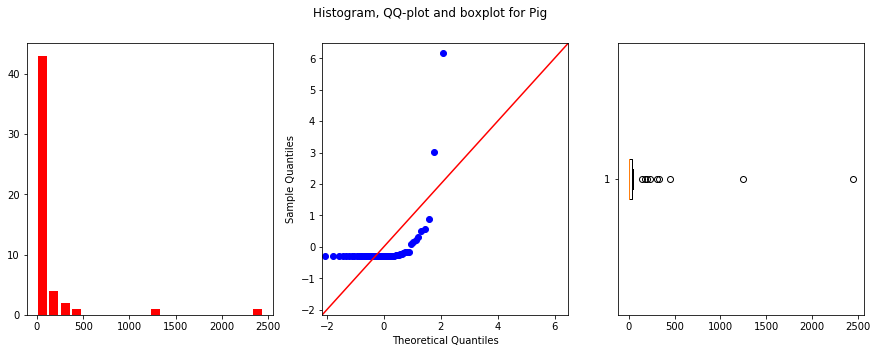

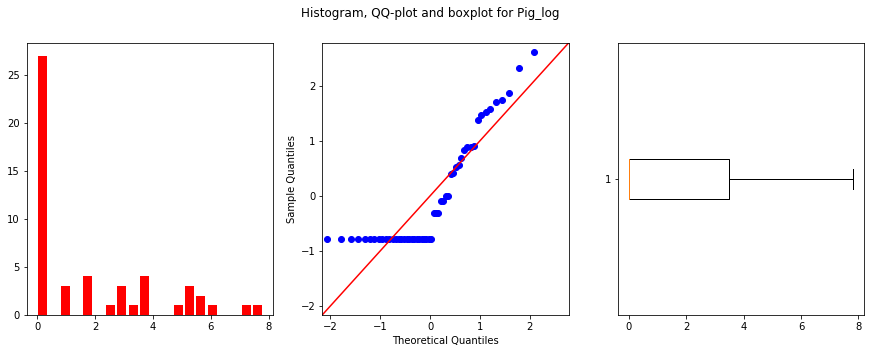

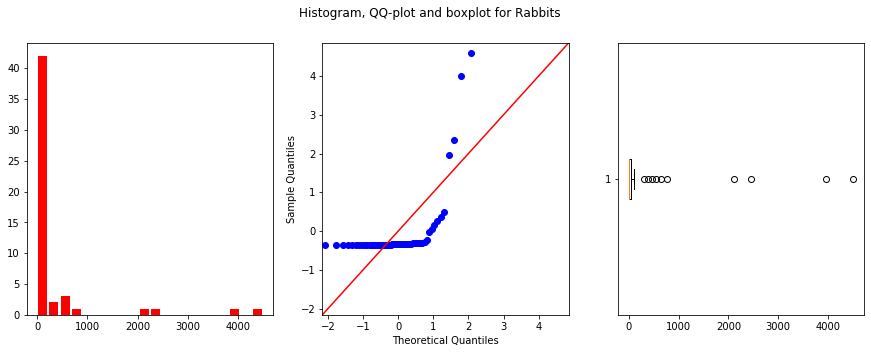

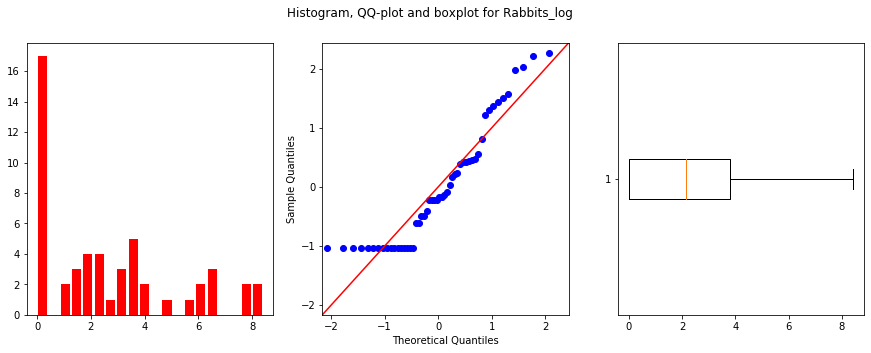

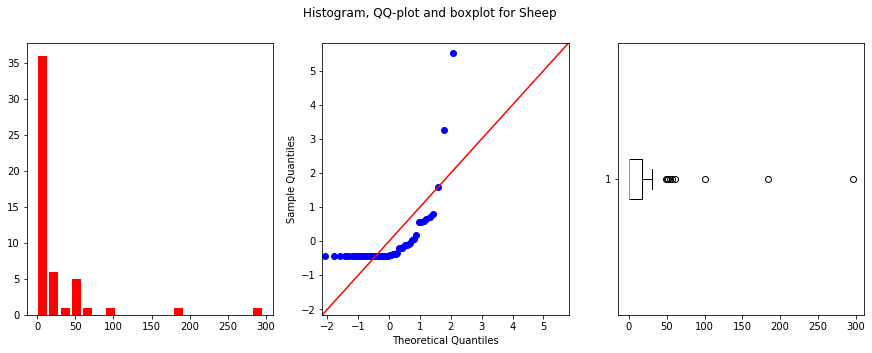

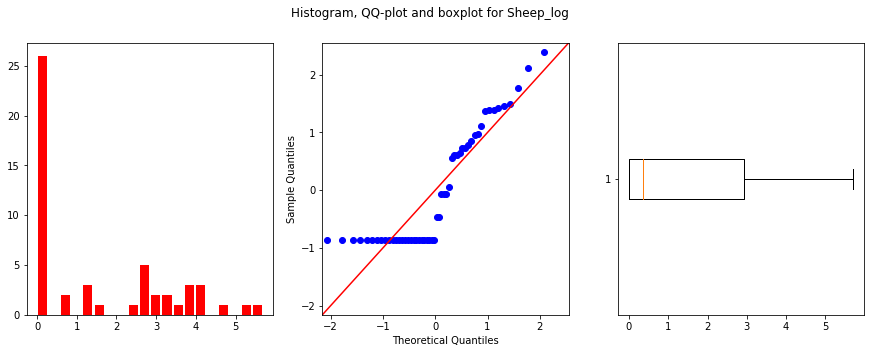

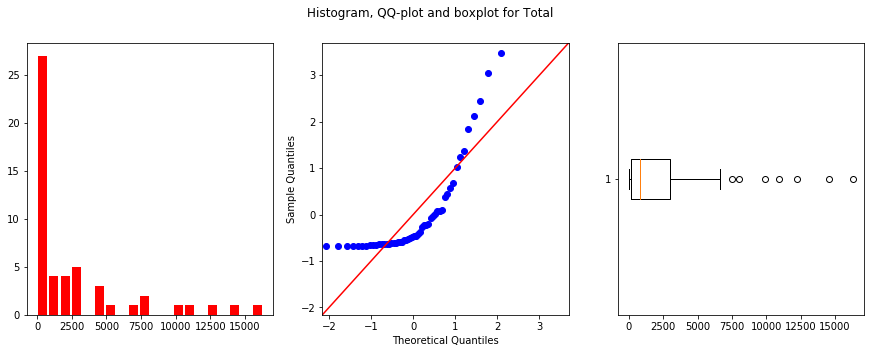

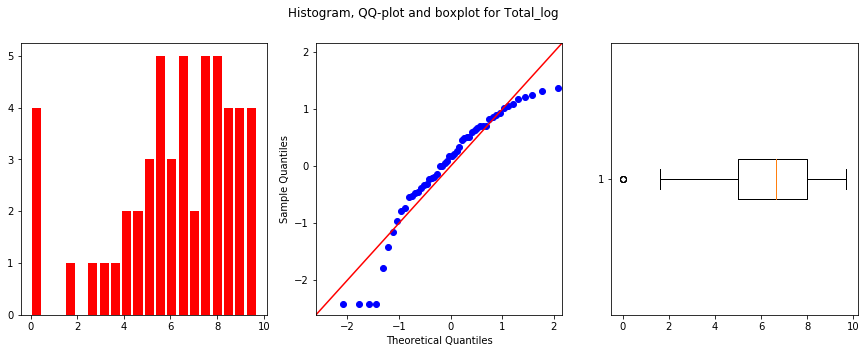

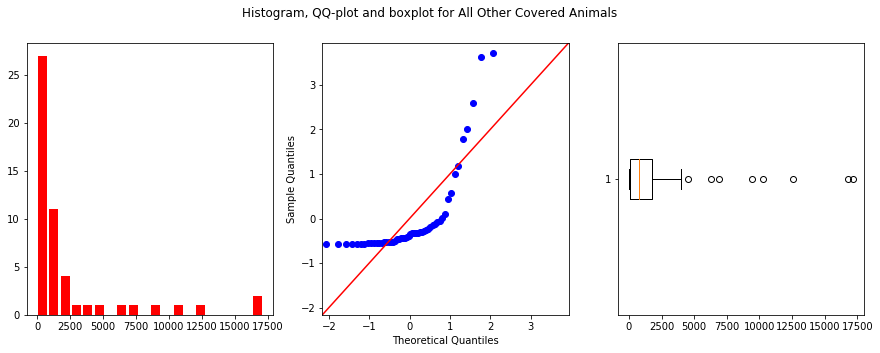

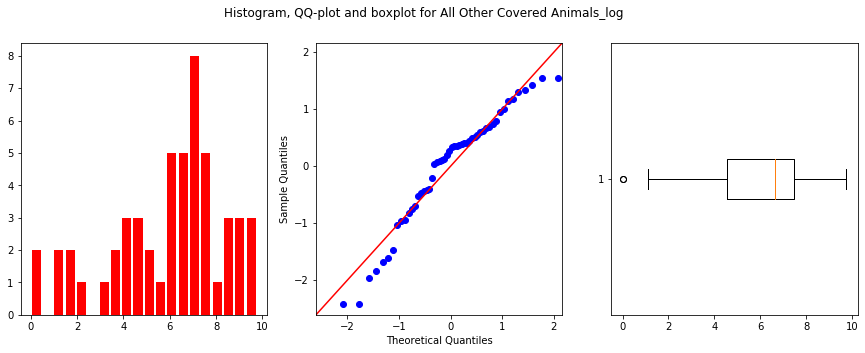

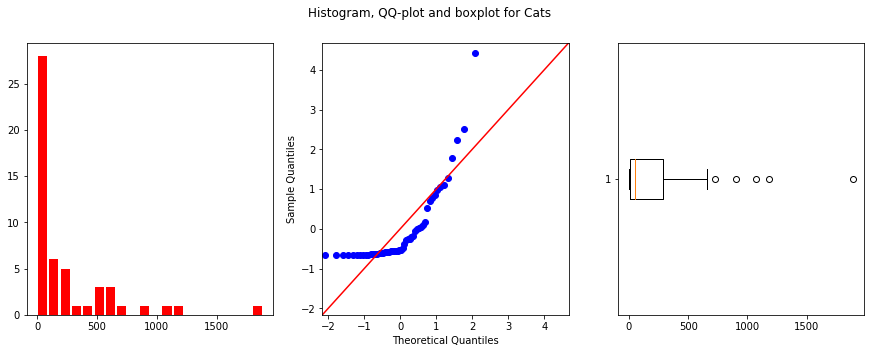

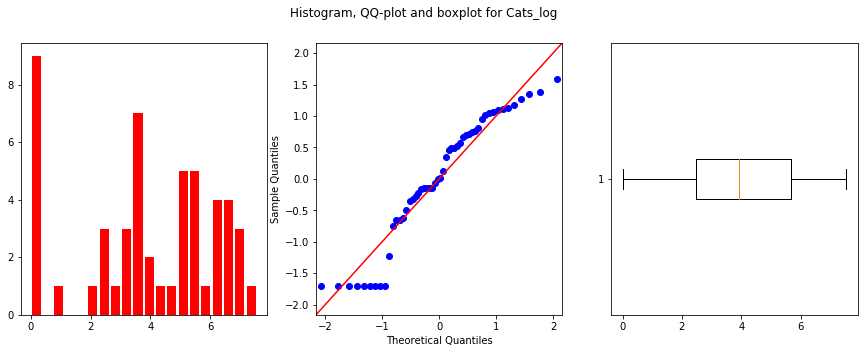

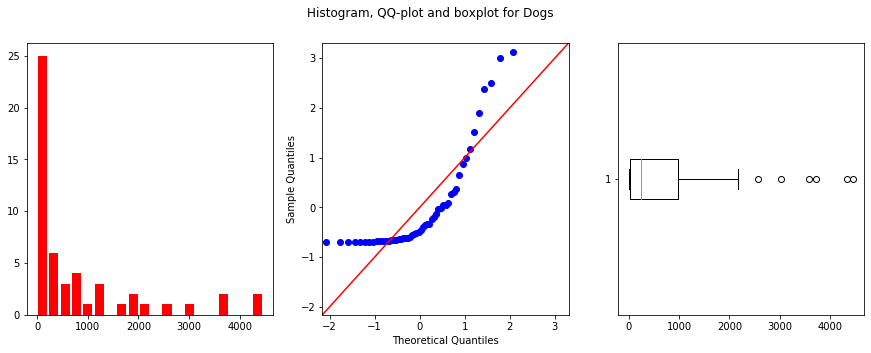

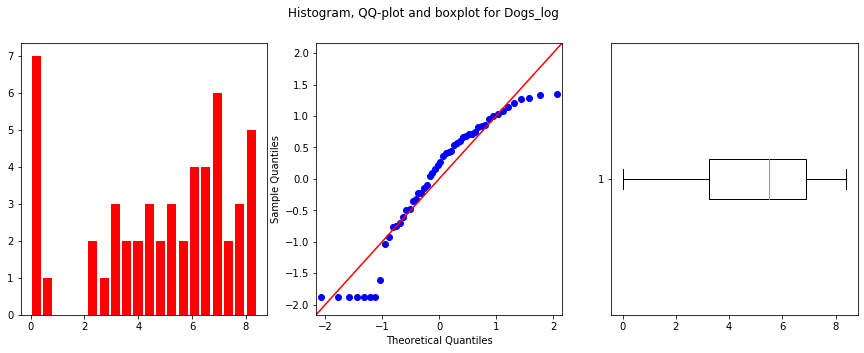

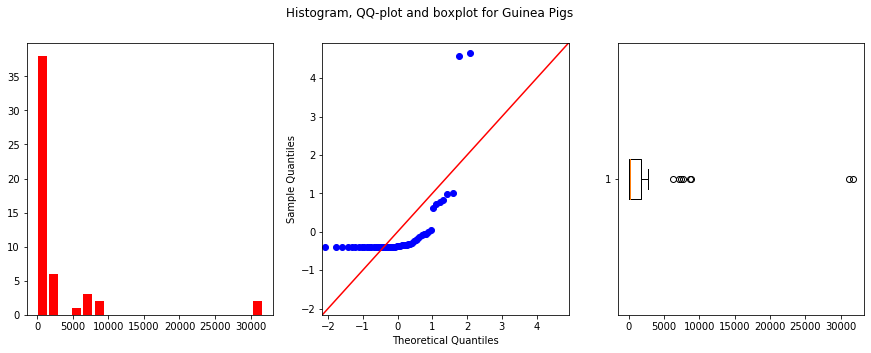

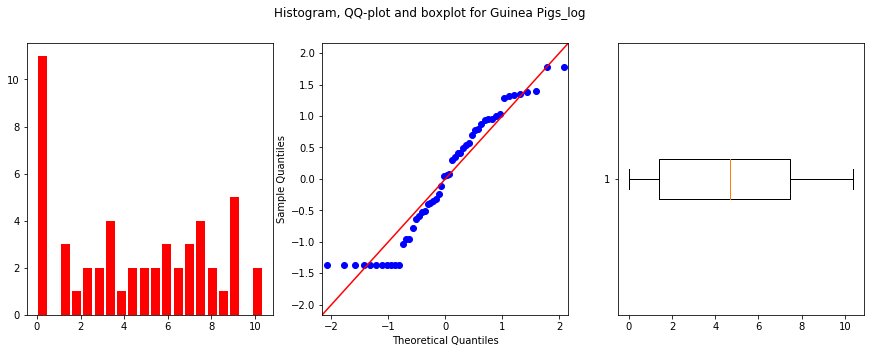

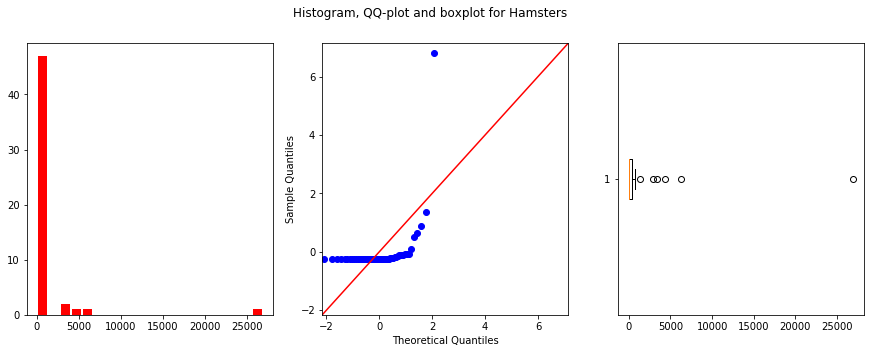

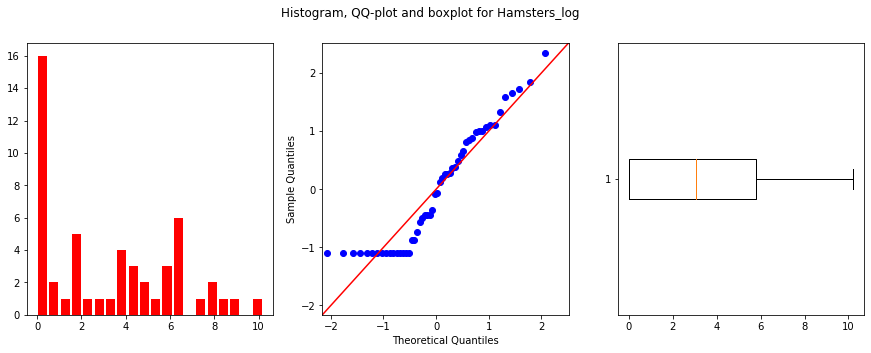

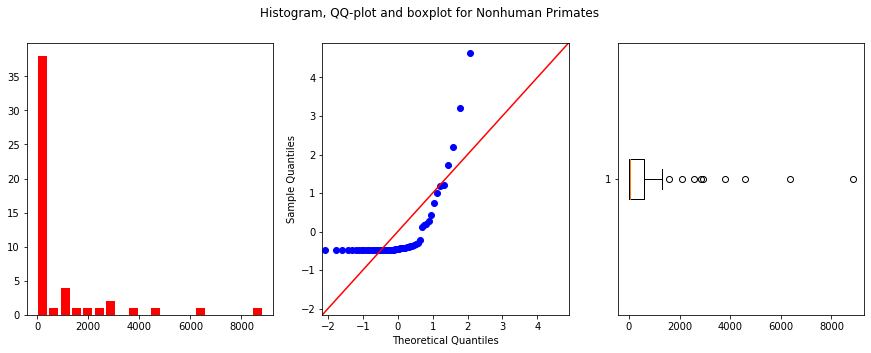

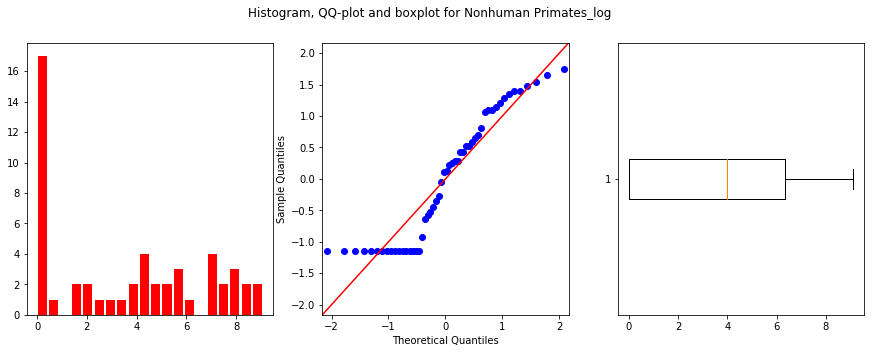

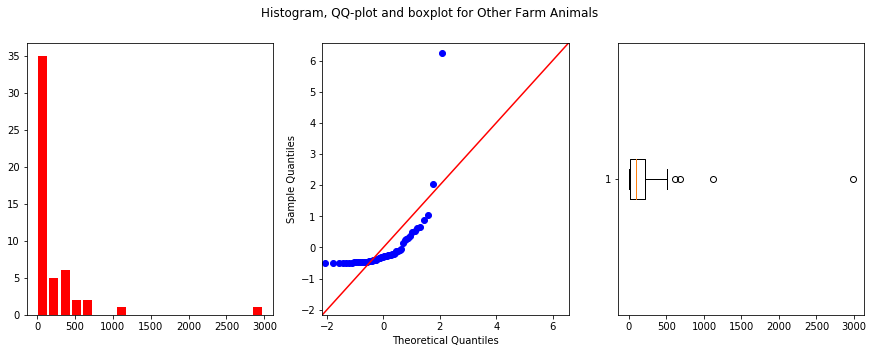

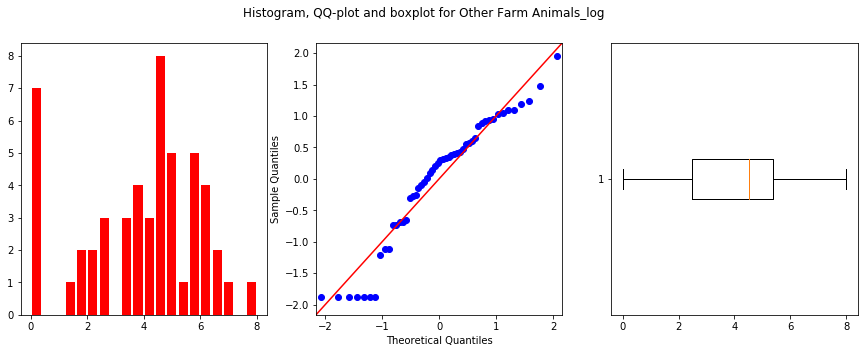

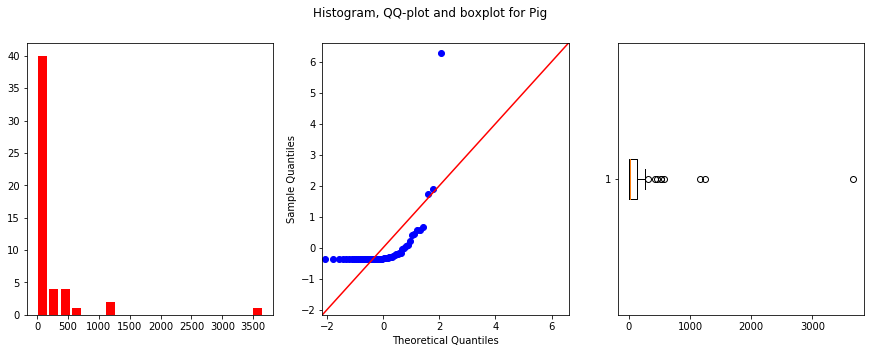

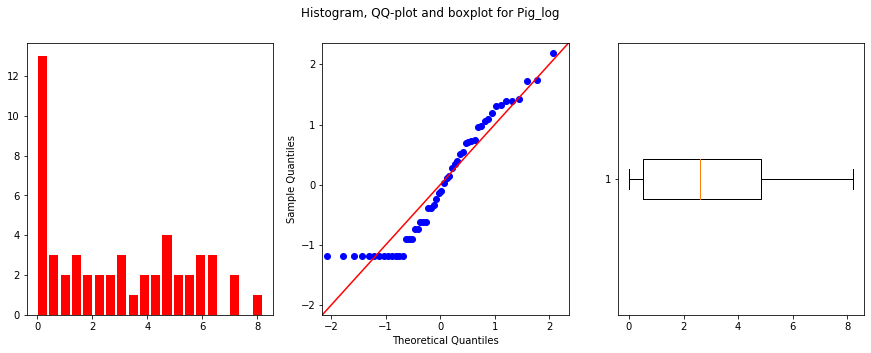

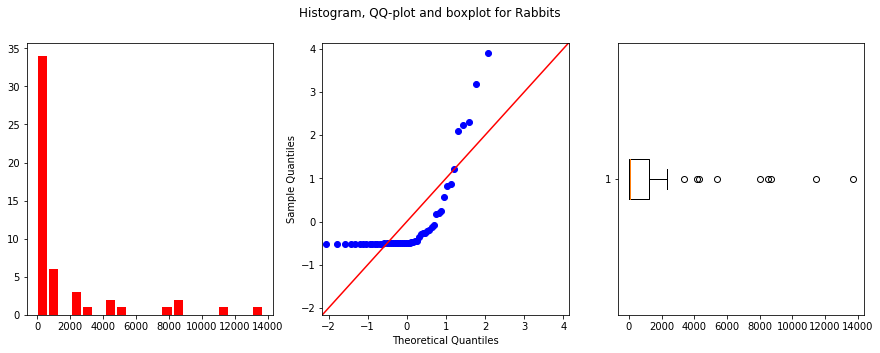

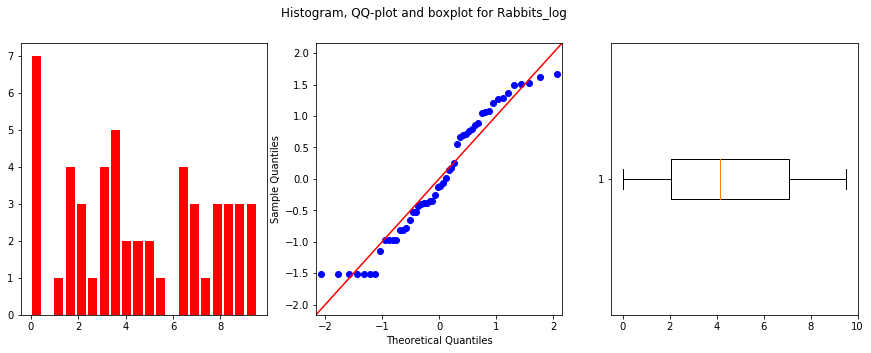

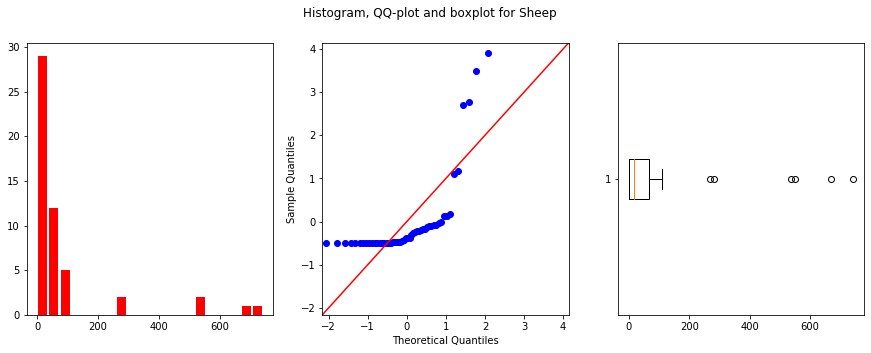

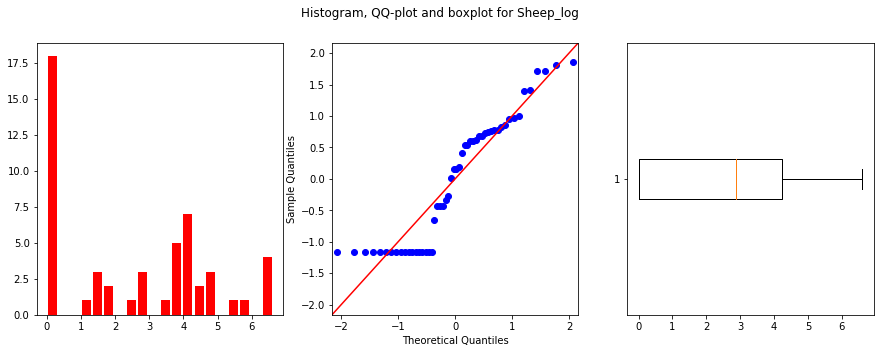

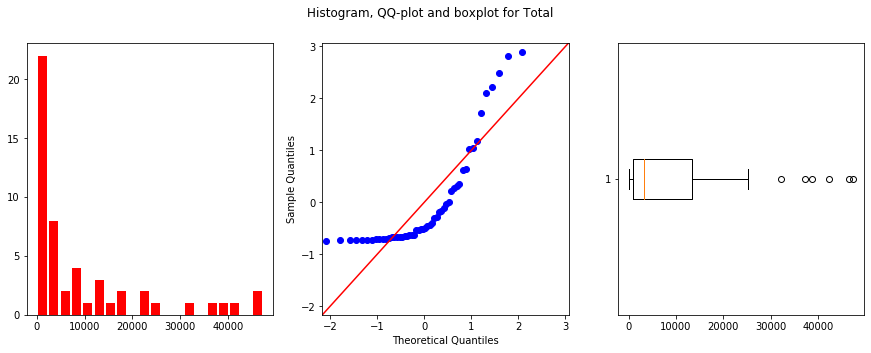

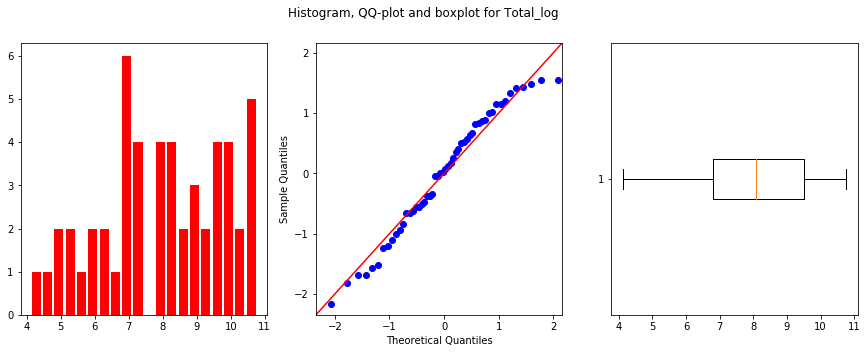

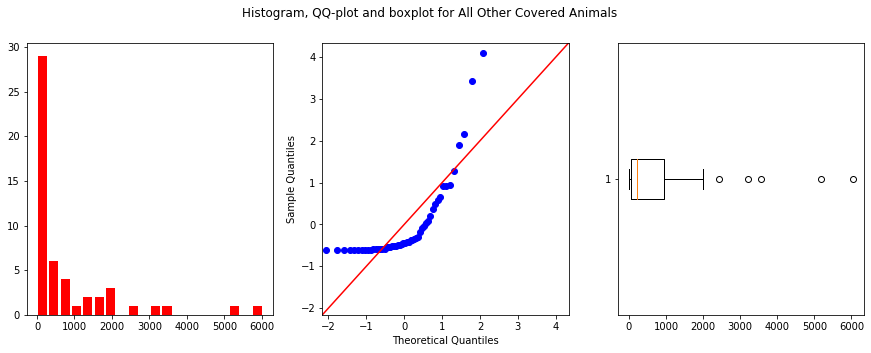

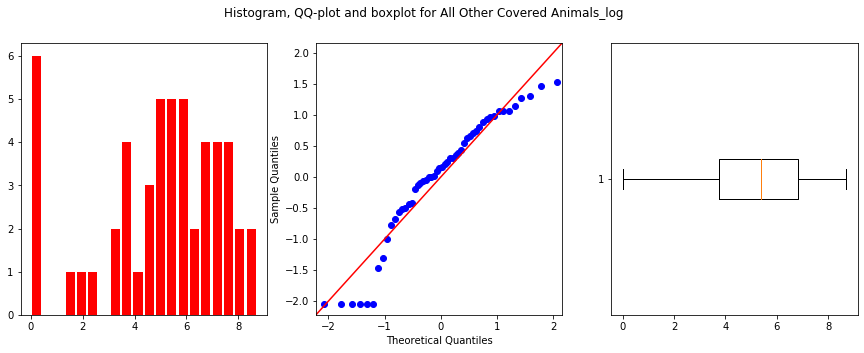

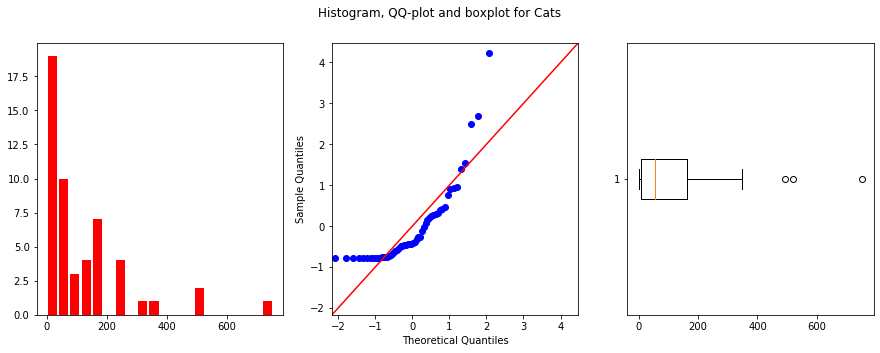

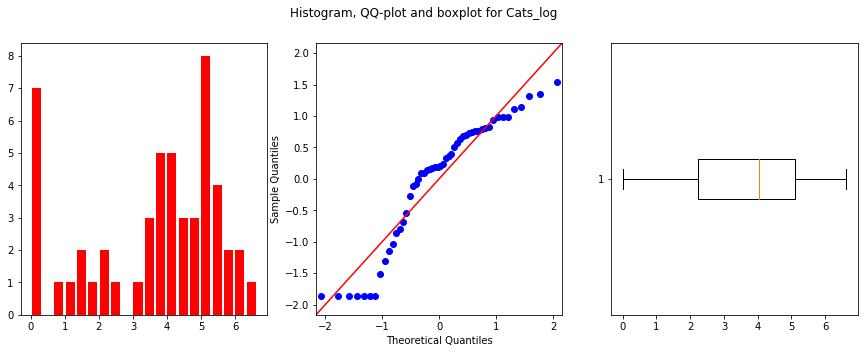

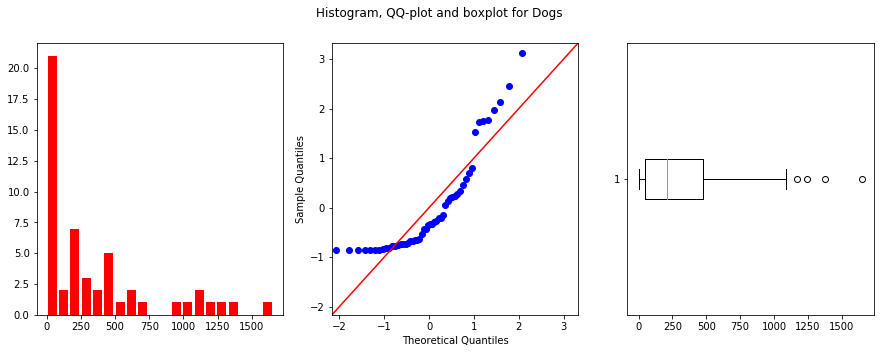

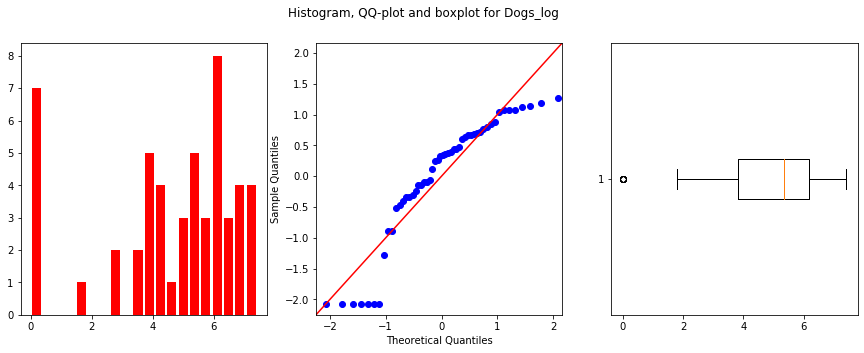

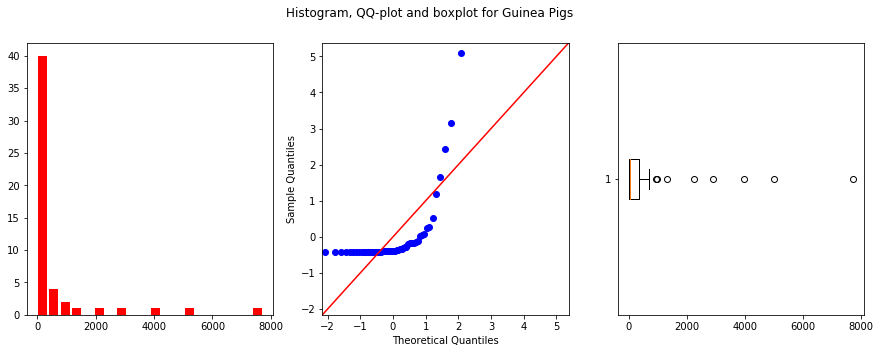

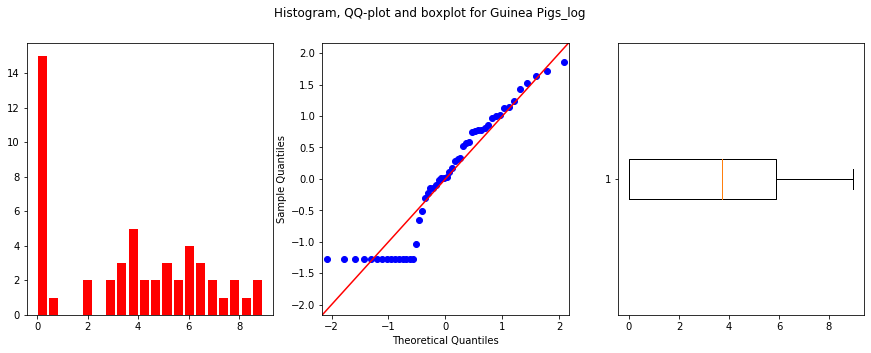

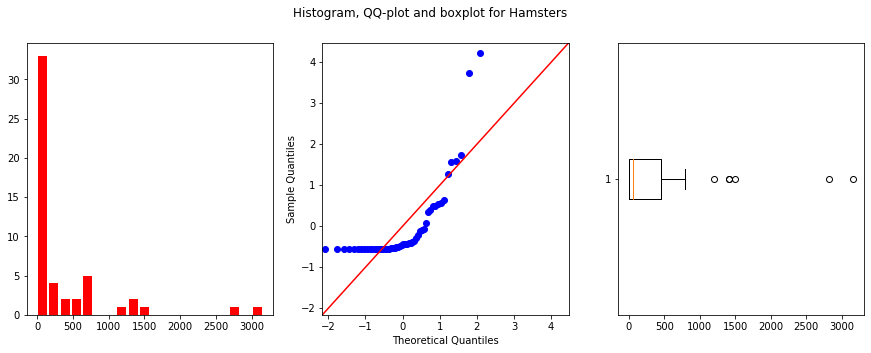

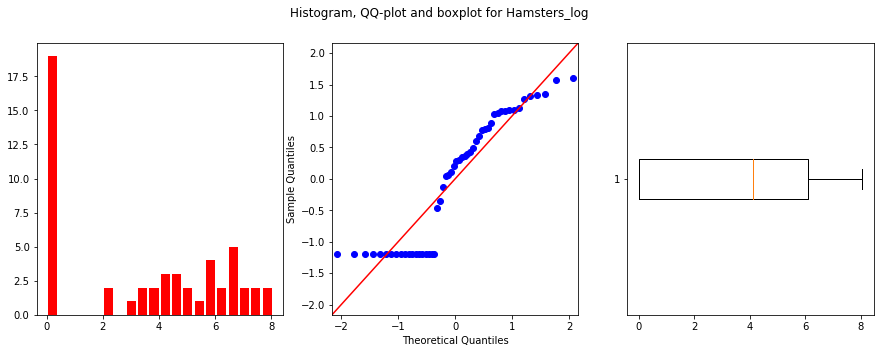

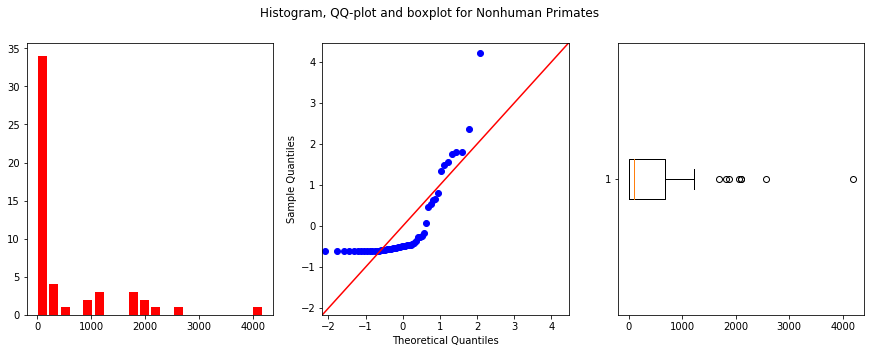

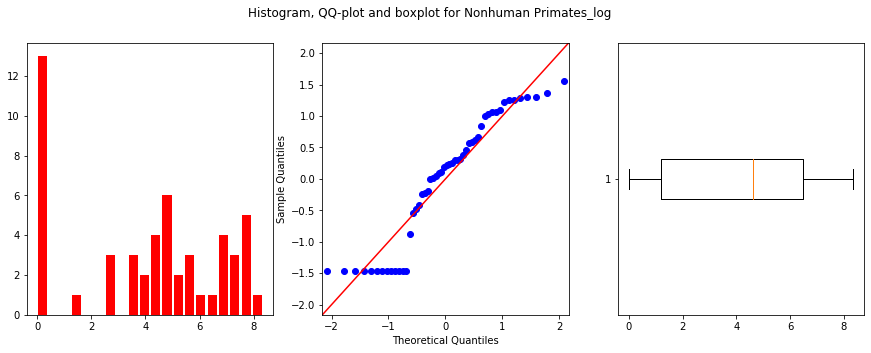

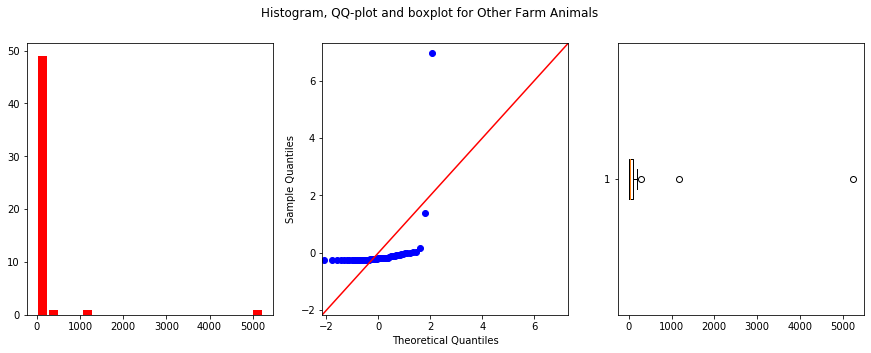

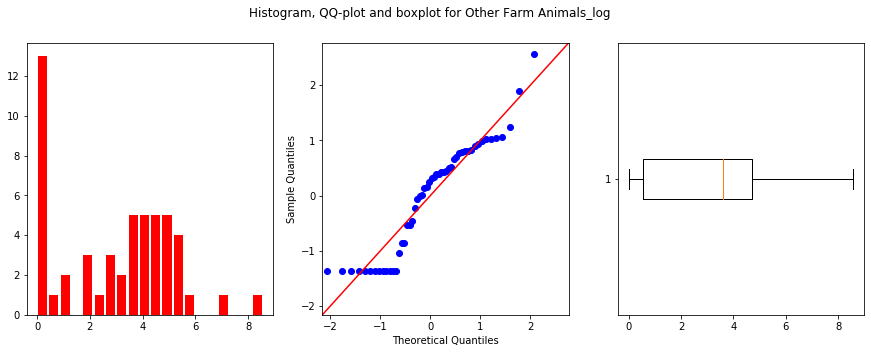

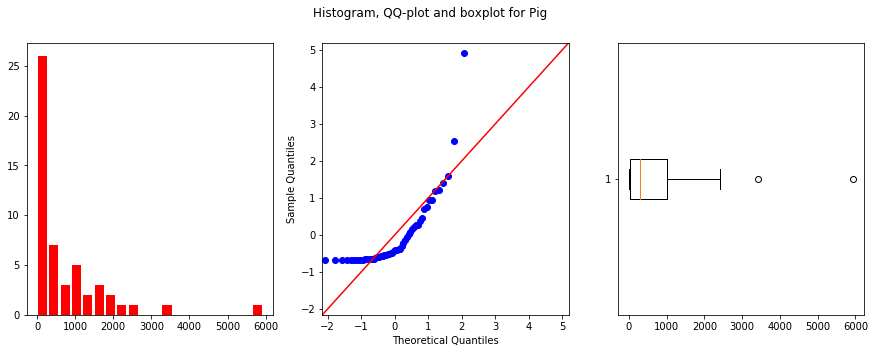

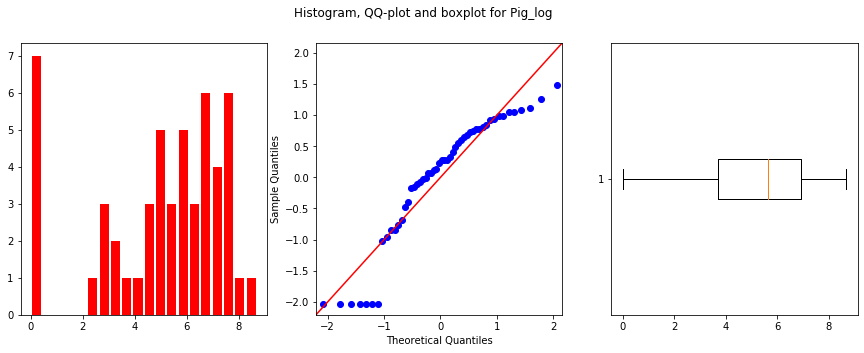

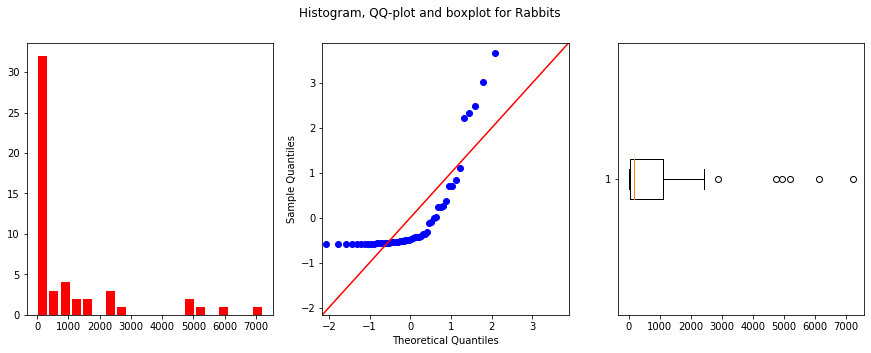

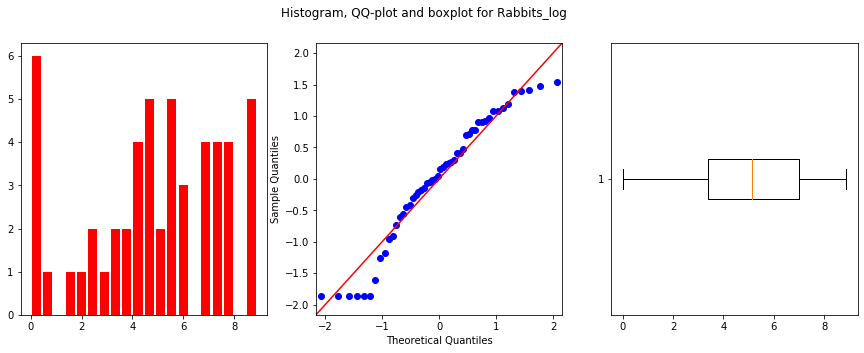

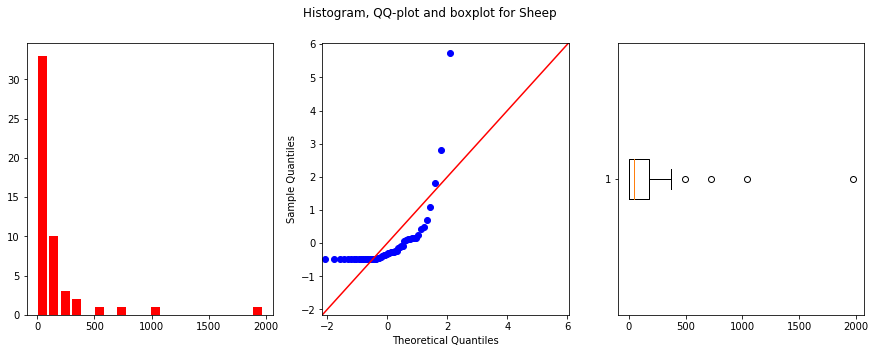

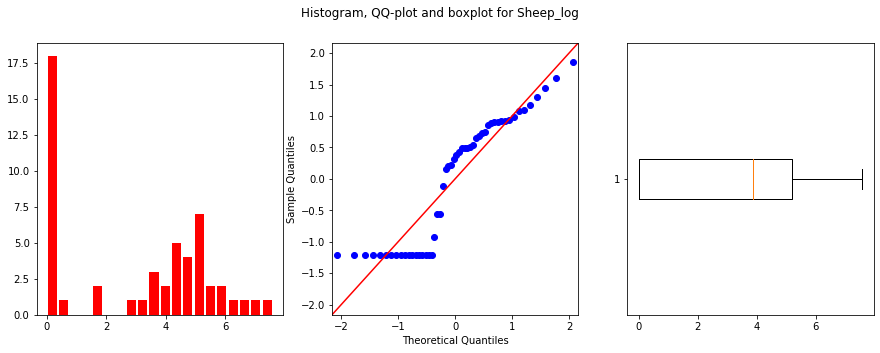

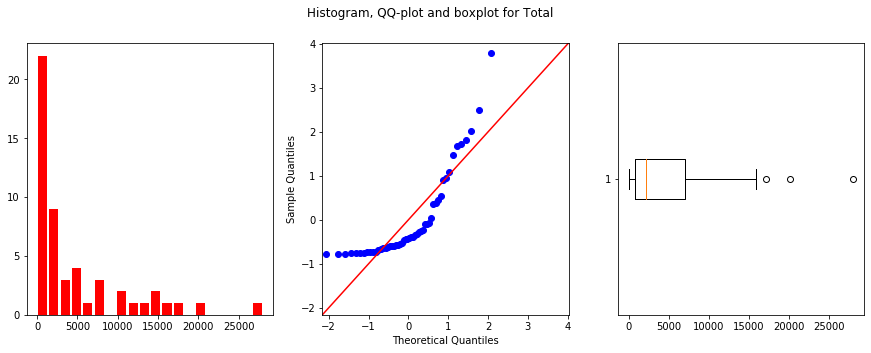

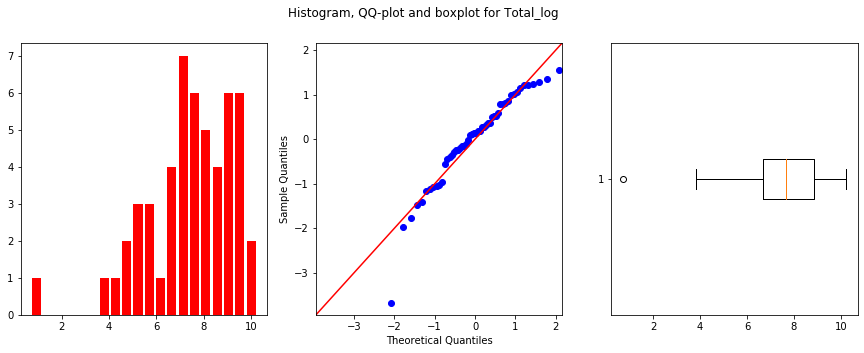

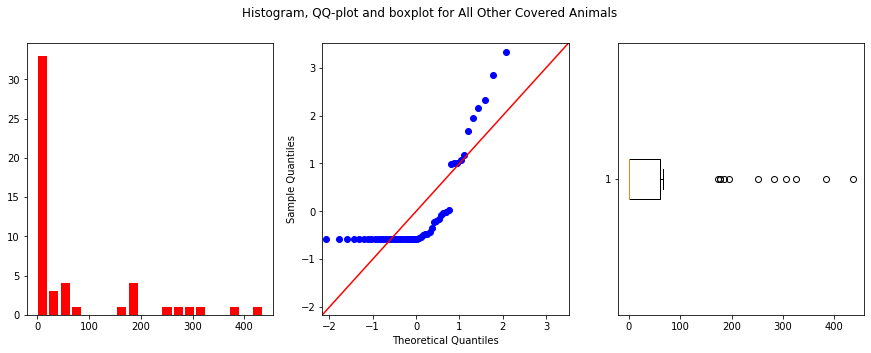

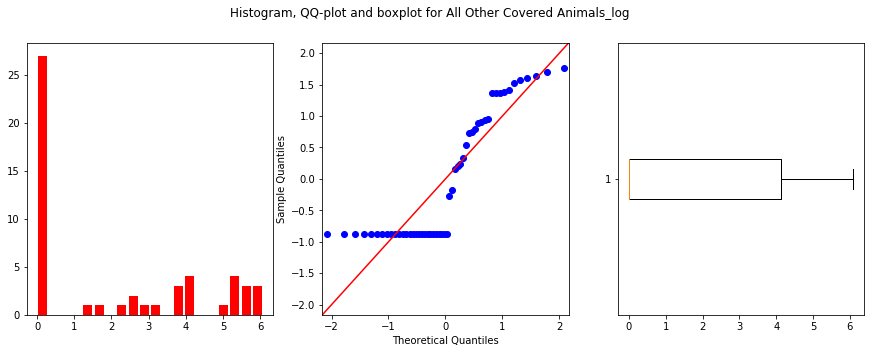

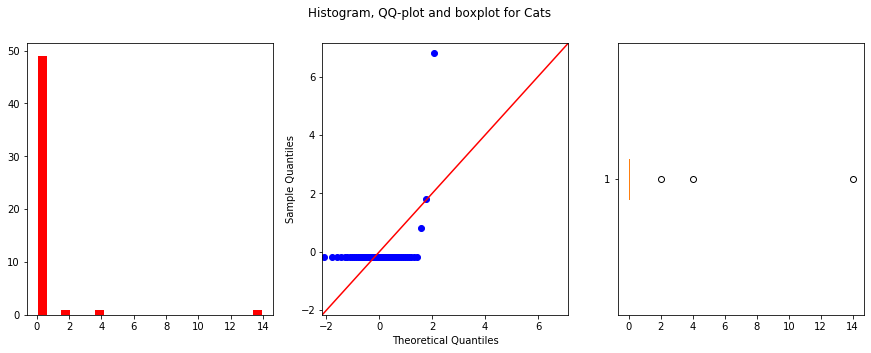

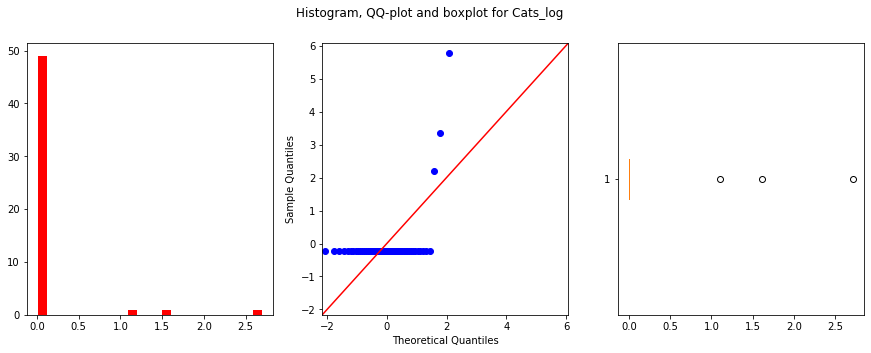

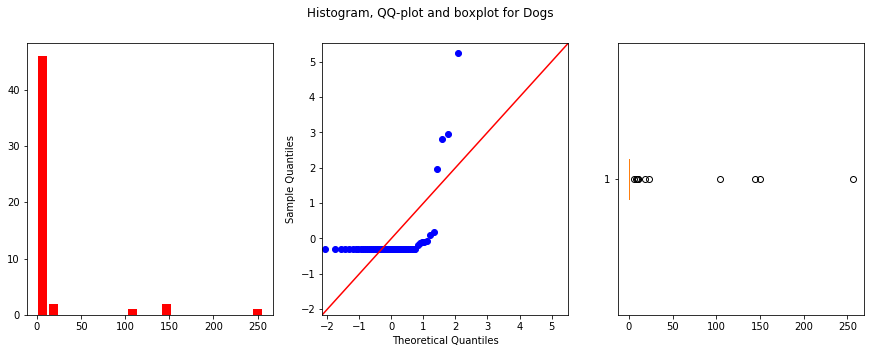

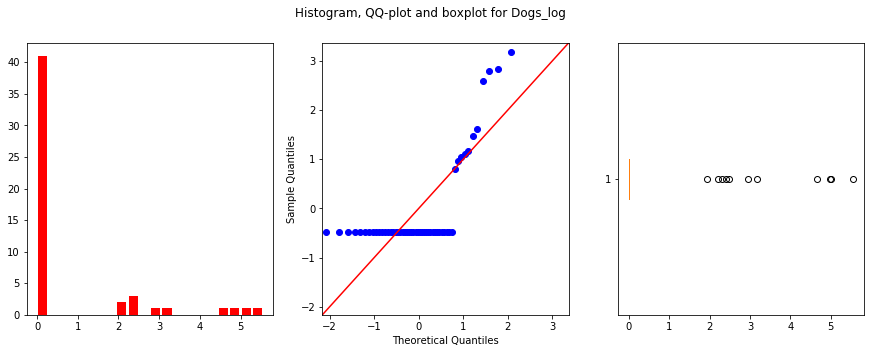

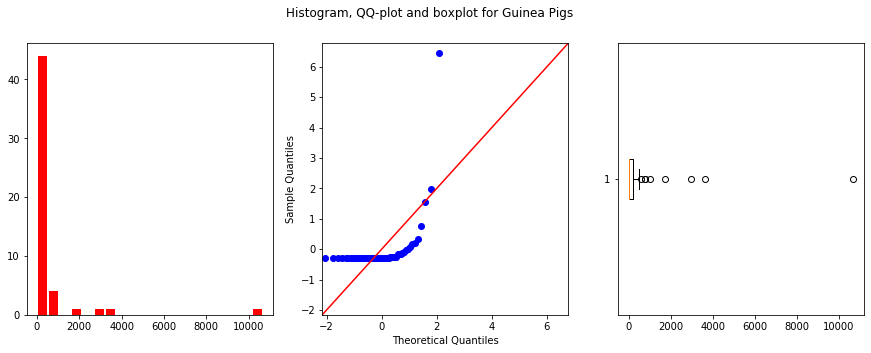

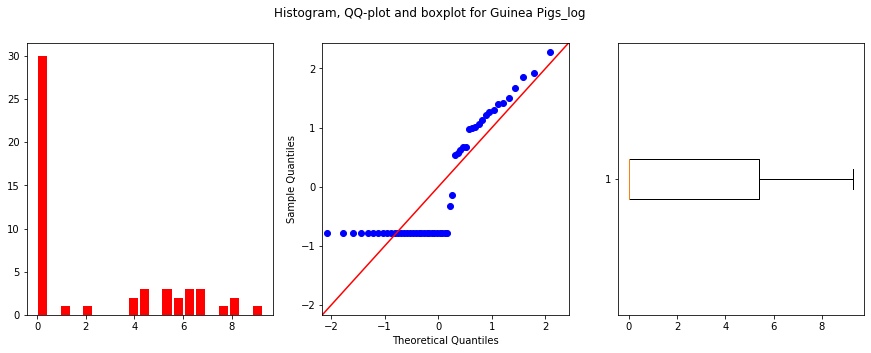

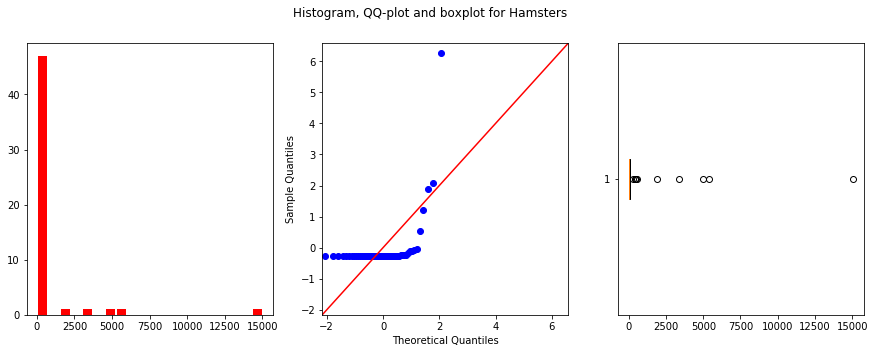

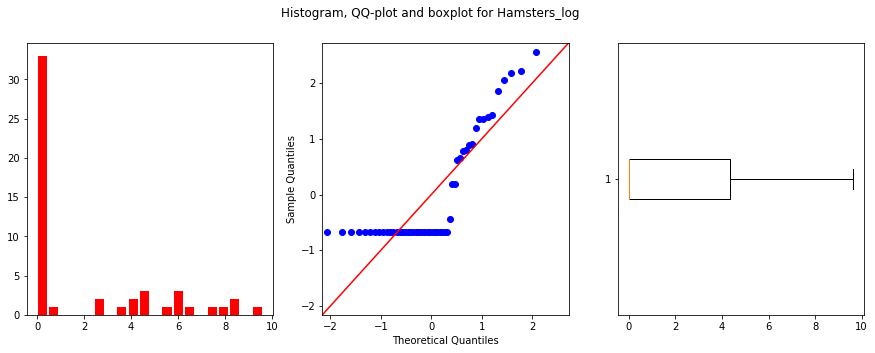

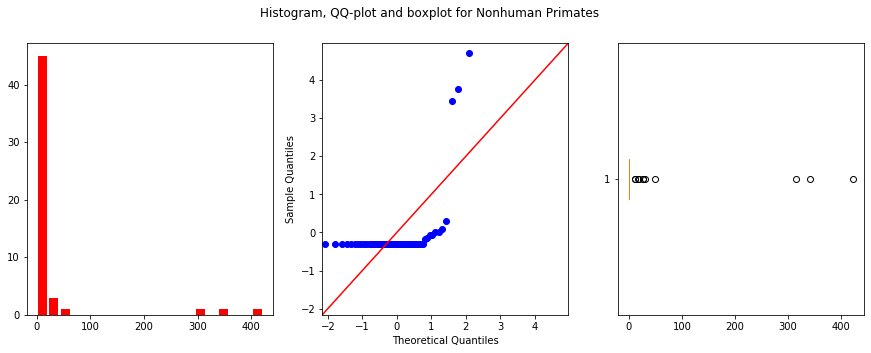

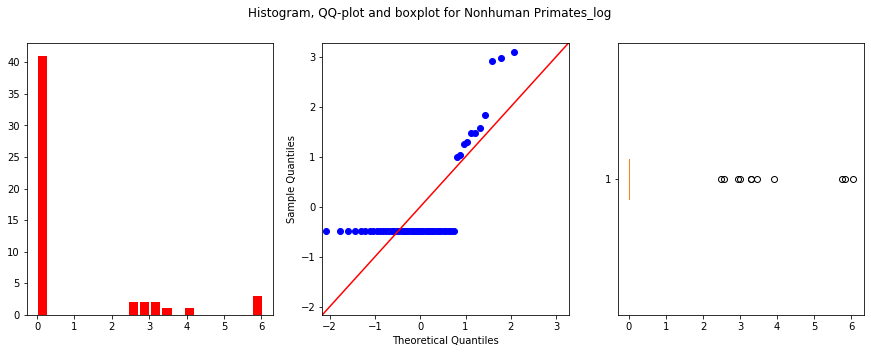

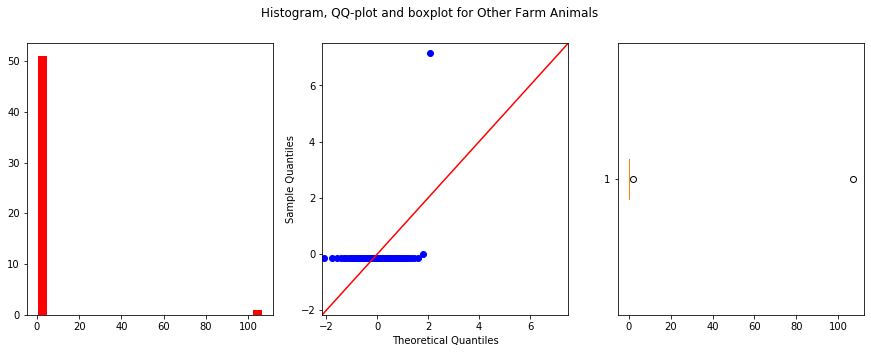

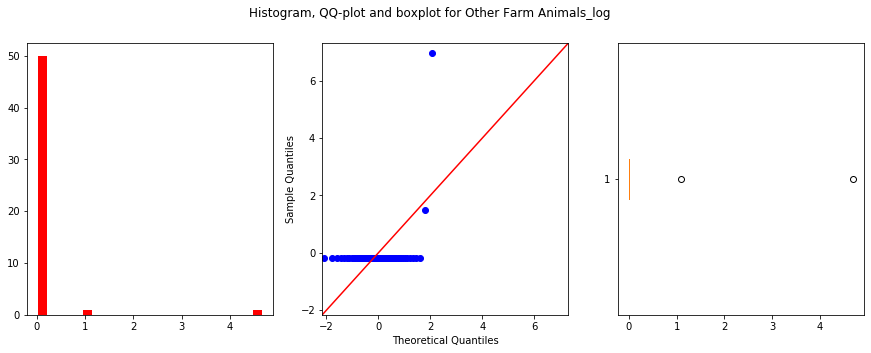

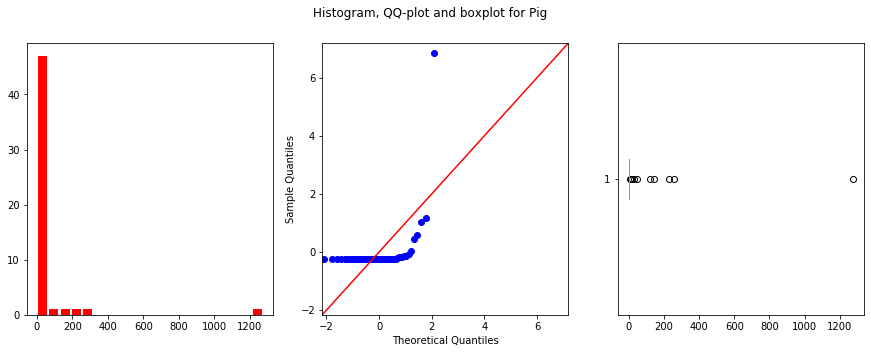

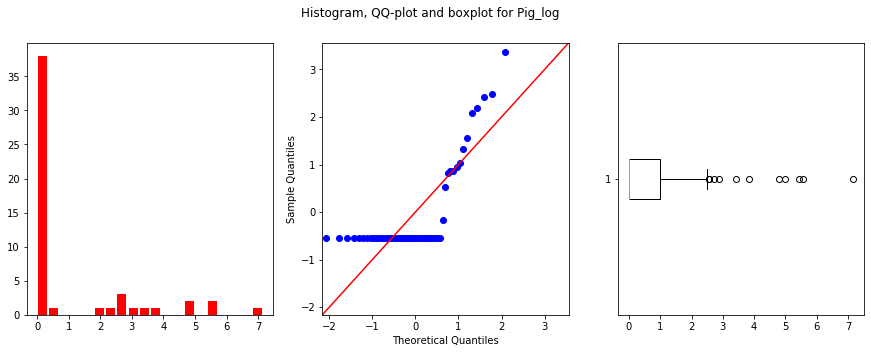

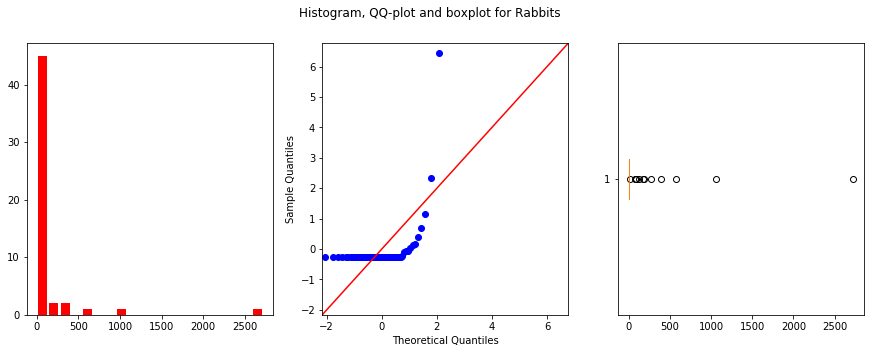

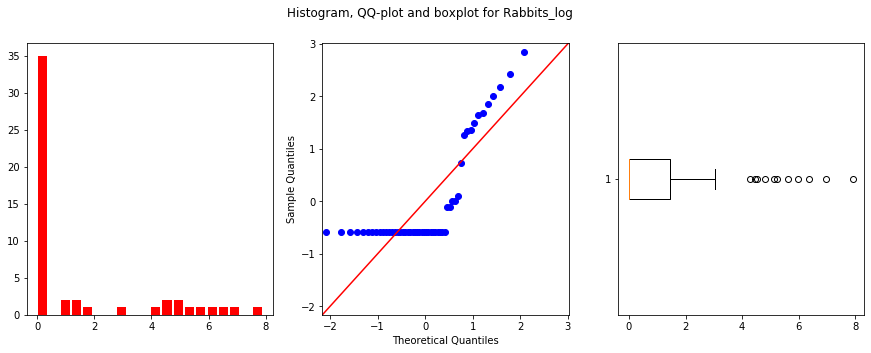

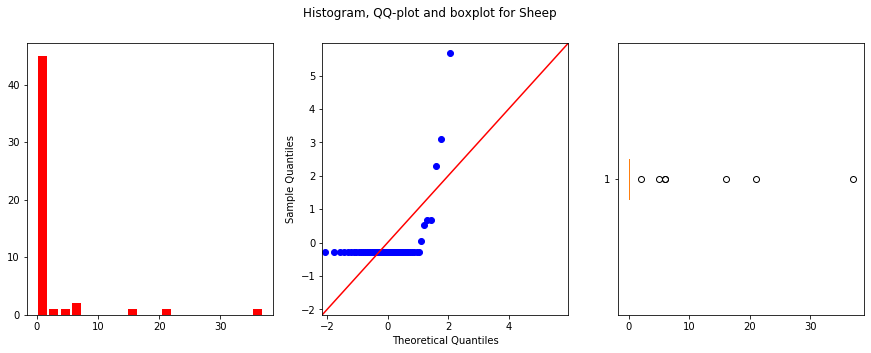

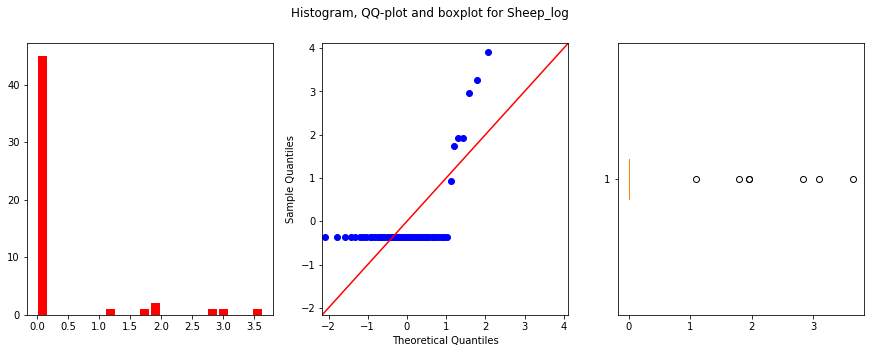

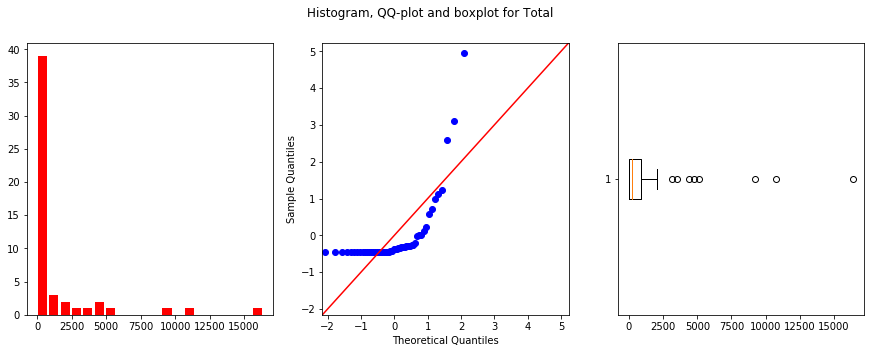

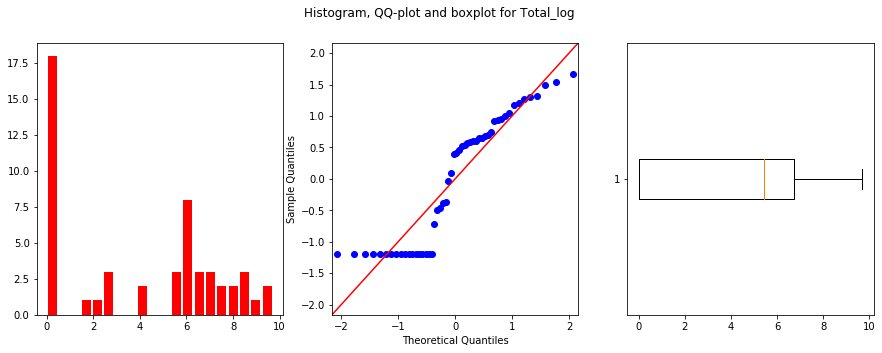

In [396]:
count = 1
for data in Datas:
    #print(Datas_name[count])
    for column in data.drop(['State', 'info'], axis = 1).columns:
        aaa = AnalyzNumCol(data, column)
        aaa.show_plots()
        aaa.show_plots(log = True)
    

Вывод
------
1. Логирифмирование позволяет убрать выбросы и улучшить данные

In [397]:
#Прологорифмируем числовые данные

for data in Datas:
    for column in data.drop(['State', 'info'], axis = 1).columns:
        data[column] = np.log(data[column] + 1)

# Этап 4. Кластеризация

In [398]:
# Подключаем библиотеки по кластеризации
import numpy as np
import matplotlib.pyplot as plt


from sklearn.metrics.cluster import silhouette_score
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [399]:
#объединяем таблицы в единую

data = colB.drop('info', axis = 1).merge(colC.drop(['info', 'Total'], axis = 1), how = 'inner', on = 'State', suffixes=('held by facility', 'NOpain_NOdrugs'))
data = data.merge(colD.drop(['info', 'Total'], axis = 1), how = 'inner', on = 'State', suffixes=(False, 'pain_drugs'))
data = data.merge(colE.drop(['info', 'Total'], axis = 1), how = 'inner', on = 'State', suffixes=(False, 'pain_NOdrugs'))

In [400]:
X = StandardScaler().fit_transform(data.drop('State', axis = 1))

In [401]:
X

array([[-0.36881692, -0.97117793, -0.93189553, ..., -0.53495687,
        -0.59196785, -0.36929765],
       [ 0.80869594,  1.72488832,  1.28234743, ..., -0.53495687,
         1.84832895, -0.36929765],
       [-0.88634292,  0.82502187,  1.10275776, ..., -0.53495687,
        -0.59196785, -0.36929765],
       ...,
       [ 0.92174812,  1.2380786 ,  2.73122255, ..., -0.53495687,
        -0.59196785, -0.36929765],
       [ 1.12947283, -0.97117793, -0.93189553, ..., -0.53495687,
        -0.59196785, -0.36929765],
       [-0.36881692, -0.97117793, -0.93189553, ..., -0.53495687,
        -0.59196785, -0.36929765]])

In [402]:
print(np.asarray(X).shape)

(52, 41)


In [403]:
# t-SNE – метод понижения размерности
from sklearn.manifold import TSNE

# Создаём объект для выполнения t-SNE
tsne = TSNE(n_components=2, random_state=0)

# Преобразуем наши данные, понизив размерность с 44 до 2
X = tsne.fit_transform(X)

print(np.asarray(X).shape)

(52, 2)


In [404]:
for i in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,13,14,15,]:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    kmeans_pred = kmeans.labels_
    print(i)
    print(silhouette_score(X=X, labels=kmeans_pred, metric='euclidean'))

2
0.5111101
3
0.38478628
4
0.31785968
5
0.3206926
6
0.32189524
7
0.3045333
8
0.29320997
9
0.28400558
10
0.25960156
11
0.2619323
12
0.26734942
13
0.24467303
14
0.23896216
15
0.25026748


In [405]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_

In [406]:
data['labels'] = kmeans_pred

In [407]:
data

,State,All Other Covered Animalsheld by facility,Catsheld by facility,Dogsheld by facility,Guinea Pigsheld by facility,Hamstersheld by facility,Nonhuman Primatesheld by facility,Other Farm Animalsheld by facility,Pigheld by facility,Rabbitsheld by facility,...,Catspain_NOdrugs,Dogspain_NOdrugs,Guinea Pigspain_NOdrugs,Hamsterspain_NOdrugs,Nonhuman Primatespain_NOdrugs,Other Farm Animalspain_NOdrugs,Pigpain_NOdrugs,Rabbitspain_NOdrugs,Sheeppain_NOdrugs,labels
0,AK,3.258097,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,AL,6.594413,4.890349,4.955827,0.000000,0.000000,0.000000,3.688879,7.130899,3.178054,...,0.000000,0.000000,0.000000,2.564949,0.000000,0.000000,0.000000,5.616771,0.000000,0
2,AR,1.791759,3.258097,4.553877,0.000000,0.693147,4.043051,0.000000,0.000000,3.713572,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
3,AZ,4.406719,1.098612,2.302585,0.000000,0.000000,1.945910,0.000000,3.401197,1.609438,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,CA,8.472614,4.934474,5.087596,4.653960,5.337538,8.187855,6.541030,3.871201,7.806289,...,0.000000,0.000000,6.326149,4.700480,0.000000,0.000000,0.000000,6.965080,0.000000,0
5,CO,6.719013,2.772589,2.995732,3.806662,2.833213,0.000000,1.386294,1.609438,0.000000,...,0.000000,0.000000,5.424950,4.317488,0.000000,0.000000,2.564949,1.098612,3.091042,0
6,CT,4.836282,1.098612,0.000000,0.693147,0.000000,2.833213,0.000000,0.000000,1.098612,...,0.000000,2.397895,0.000000,6.169611,3.295837,0.000000,0.000000,1.098612,0.000000,1
7,DC,0.000000,2.944439,0.000000,4.962845,3.637586,5.891644,0.000000,1.791759,2.197225,...,0.000000,0.000000,5.616771,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
8,DE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.948760,0.000000,8.284252,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
9,FL,6.725034,3.433987,2.708050,0.693147,4.204693,8.274867,0.000000,1.791759,0.000000,...,0.000000,1.945910,6.037871,0.000000,0.000000,0.000000,2.484907,0.000000,0.000000,0


Вывод
------

Было выделено два клестера

Описание кластеров
------

In [408]:
Datas_coppy = [allinall_copy, colB_copy, colC_copy, colD_copy, colE_copy]

In [409]:
for data in Datas_coppy:
    data['lables'] = kmeans_pred

In [415]:
xaxis = ["all", "held by facility","No pain; No pain drugs","Yes pain; Yes pain drugs","Yes pain; No pain drugs"]
value =[]

for data in Datas_coppy:
    value.append(data[data['lables'] == 0].Total.sum())


fig = go.Figure(data=go.Scatter(x=xaxis,y=value))

fig.show()

In [418]:
len(allinall_copy[allinall_copy['lables'] == 0])

26

In [416]:
xaxis = ["all", "held by facility","No pain; No pain drugs","Yes pain; Yes pain drugs","Yes pain; No pain drugs"]
value =[]

for data in Datas_coppy:
    value.append(data[data['lables'] == 1].Total.sum())


fig = go.Figure(data=go.Scatter(x=xaxis,y=value))

fig.show()

In [419]:
len(allinall_copy[allinall_copy['lables'] == 1])

26

Вывод
------
1. Общее количество кластеров разделено на 2 равные группы штатов по 26 штатов
2. Первый кластер - занимает существенное количество животных для испытаний. Он имеет следующие характеристики:
   - New Jersey, California, Massachusetts, Ohio, Maryland, Minnesota, Missouri, Texas, Wisconsin, Michigan, Pennsylvania, Washington, North Carolina, New York, Georgia, Indiana, Iowa, Illinois, Virginia, Colorado, Florida, Alabama, Tennessee, Arizona, Kansas, Utah;
   - общее количество 746 958 животных;
   - не задействованных 111 705 животных;
   - количество животных, используемых в исследованиях без боли и без использования обезбаливающих - 456 521;
   - количество животных, используемых в исследованиях с болью и использованием обезбаливающих - 221 116;
   - количество животных, используемых в исследованиях с болью но без обезбалевающих - 69 321; 
3. Второй кластер - содержит небольшое количество животных (73 854 животных). Он имеет следующие характеристики:
   - District of Columbia, Delaware, Puerto Rico, Oklahoma, Oregon, New Mexico, South Carolina, Arkansas, Louisiana, Connecticut, West Virginia, Vermont, Kentucky, Nebraska, New Hampshire, Nevada, South Dakota, Montana, Maine, Mississippi, North Dakota, Idaho, Rhode Island, Alaska, Hawaii, Wyoming;
   - общее количество 73 854 животных;
   - не задействованных 25 739 животных;
   - количество животных, используемых в исследованиях без боли и без использования обезбаливающих - 45 039;
   - количество животных, используемых в исследованиях с болью и использованием обезбаливающих - 26 766;
   - количество животных, используемых в исследованиях с болью но без обезбалевающих - 2 049.  

In [413]:
for data in Datas_coppy:
    tt = data.loc[0, 'info']
    Nind = data[data['lables'] == 0].Total.sort_values(ascending=False).index.values
    Scol = data[data['lables'] == 0].reindex(Nind)
    requiredcolumns = data.columns[1:11]
    Layerlist= []
    for yaxis in range(10):
        Layerlist.append(go.Bar(x=Scol.State,y=Scol[requiredcolumns[yaxis]],name=requiredcolumns[yaxis],
                                text = Scol[requiredcolumns[yaxis]]))
    
    Layout= go.Layout(barmode="relative", title = tt)
    fig = go.Figure(data = Layerlist,layout = Layout)
    fig.show()

Вывод
------

1. Совокупное использование животных во всех типах исследований:
   - первые три места занимают следующие штаты: New Jersey, California, Massachusetts.
   - наибольшее количество морских свинок, других животных, кроликов;
   - наименьшее количество овец, котов и других животных.
2. Не используемые животные:
   - первые три места занимают Texas, Michigan, California
   - Наибольшее количество животных другие виды животных, приматы, морские свинки
   - менее всего осталось овец, котов и других сх животных
3. Использование животных во всех типах исследований, где животные не чувствуют боли и не принимают лекарства от нее:
   - Первые три места занимают Ohio, New Jersey, Massachusetts
   - Наиболее часто используют морских свинок, другие виды животных, кроликов
   - меньше всего используют овец, других сх животных, свиней
4. Использование животных во всех типах исследований, где животные чувствуют боли и принимают лекарства от нее:
   - превые три места занимают California, Maryland, Massachusetts 
   - Наиболее часто используют кролики, свиньи и другие животные
   - меньше всего используют овец, котов и другие сельскохозяйственные животные
5. Использование животных во всех типах исследований, где животные чувствуют боли, но не принимают лекарства от нее:
   - Первые три места занимают Missouri, Michigan, New Jersey
   - Наиболее часто используют хомяки, морские свинки, собаки
   - меньше всего используют котов, овец, других сх животных

In [414]:
for data in Datas_coppy:
    tt = data.loc[0, 'info']
    Nind = data[data['lables'] == 1].Total.sort_values(ascending=False).index.values
    Scol = data[data['lables'] == 1].reindex(Nind)
    requiredcolumns = data.columns[1:11]
    Layerlist= []
    for yaxis in range(10):
        Layerlist.append(go.Bar(x=Scol.State,y=Scol[requiredcolumns[yaxis]],name=requiredcolumns[yaxis],
                                text = Scol[requiredcolumns[yaxis]]))
    
    Layout= go.Layout(barmode="relative", title = tt)
    fig = go.Figure(data = Layerlist,layout = Layout)
    fig.show()

Вывод
------

1. Совокупное использование животных во всех типах исследований:
   - первые три места занимают следующие штаты: District of Columbia, Delaware, Puerto Rico.
   - наибольшее количество других видов животных, приматов, кроликов;
   - наименьшее количество котов, хомяков и овец.
2. Не используемые животные:
   - первые три места занимают Louisiana, Delaware, South Carolina
   - Наибольшее количество животных приматы, другие виды животных, кролики
   - менее всего осталось хомяков, котов, собак
3. Использование животных во всех типах исследований, где животные не чувствуют боли и не принимают лекарства от нее:
   - Первые три места занимают District of Columbia,  Delaware, West Virginia
   - Наиболее часто используют другие виды животных, кролики, приматы
   - меньше всего используют свиней, овец, хомяков 
4. Использование животных во всех типах исследований, где животные чувствуют боли и принимают лекарства от нее:
   - превые три места занимают Connecticut, Oklahoma, New Mexico 
   - Наиболее часто используют другие виды животных, свиньи и кролики
   - меньше всего используют хомяки, другие сельскохозяйственные животные, морские свинки
5. Использование животных во всех типах исследований, где животные чувствуют боли, но не принимают лекарства от нее:
   - Первые три места занимают Connecticut, Oklahoma, New Mexico
   - Наиболее часто используют хомяки, морские свинки, кролики
   - меньше всего используют других сх животных, овец, приматов 

# Резюме

1. Проделана следующая работа:
   - Проведен предварительный анализ данных
   - в ходе анализа избавились от выбрасов
   - проведена кластеризация
2. В ходе проведения анализа сделаны два вывода:
   - все штаты США по использованию животных в опытах можно разделить на 2 кластера: основой разделения является фактическое использование животных;
   - в дополнению к данному исследованию можно дополнить сведенья из баз научных статей (Scopus и Web of science), а также концентрации университетов, частных лабораторий и сопоставив использование животных для различного рода исследований и испытаний определить направления развития фарминдустрии, косметологической индустрии и осуществить прогноз по выводу новых продуктов в ближайшие 5 лет